In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
len(test_df)

input\sample_submission.csv
input\test.csv
input\train.csv


4277

### Libraries

Below is all the libraries necessary to run the code.

In [15]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Exploratory Data Analysis

Exploratory data analysis (EDA) is performed on the datasat to investigate features. 

### Data Description

First, the data is presented using the head() function to show what features exist within the data.

In [16]:
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [17]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

The current features of the dataset are each described below.
* PassengerID - in form gggg_pp. gggg represents the group the passenger is travelling in and pp represents the person number within the group
* HomePlanet - Passenger's planet of residence
* CryoSleep - Bool value for if passenger is in cryosleep
* Cabin - which cabin they have booked on the spaceship
* Destination - where the passenger is going
* Age - the age of the passenger
* VIP - Bool value if passenger is a VIP
* RoomService - amount of credits passenger has spent on room service
* FoodCourt - amount of credits passenger has spent at the food court
* ShoppingMall - amount of credits passenger has spent at the mall
* Spa - amount of credits passenger has spent
* VRDeck - amount of credits passenger has spent at VR Deck
* Name - passenger's name
* Transported - If the patient was transported to another dimension. This is the target variable that the model will need to predict.

The target feature which the models will predict is the 'Transported' feature. This feature shows wether or not a passenger was transported. Firstly the target feature is plot as pie chart to illustrate the distrubtion of passengers that were transported or not.

Text(0.5, 1.0, 'Target distribution')

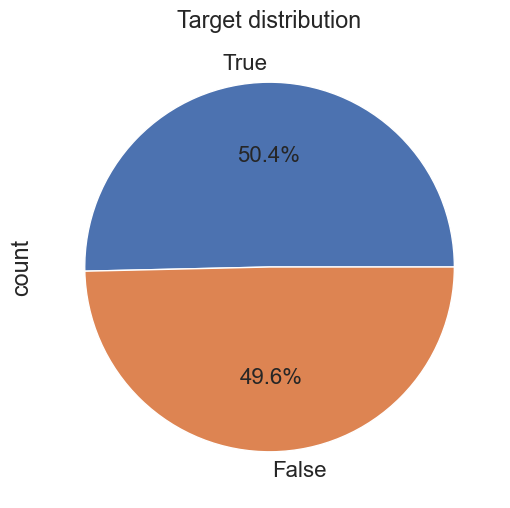

In [18]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train_df['Transported'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, textprops={'fontsize':16}).set_title("Target distribution")

The pie shart shows the target is evenly balanced between true and false.

In [19]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [13]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
def get_categorical_variables(df):
    return df.select_dtypes(include=['object']).columns

def get_numerical_variables(df):
    return df._get_numeric_data().columns

In [21]:
c_var=get_categorical_variables(train_df)
for col in c_var:
    print(col)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [22]:
n_var=get_numerical_variables(train_df)
for col in n_var:
    print(col)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


Text(0.5, 0, 'Age (years)')

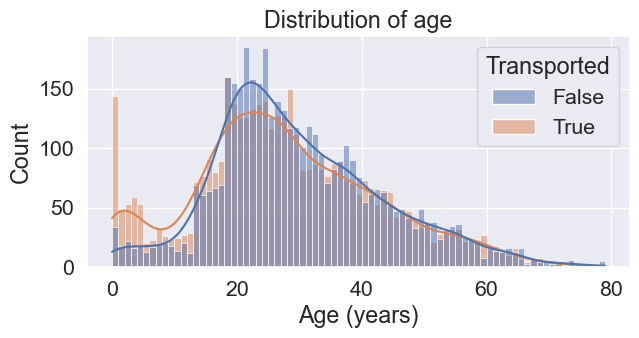

In [23]:
# Figure size
plt.figure(figsize=(7,3))

# Construct Histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

# Plot labels
plt.title('Distribution of age')
plt.xlabel('Age (years)')

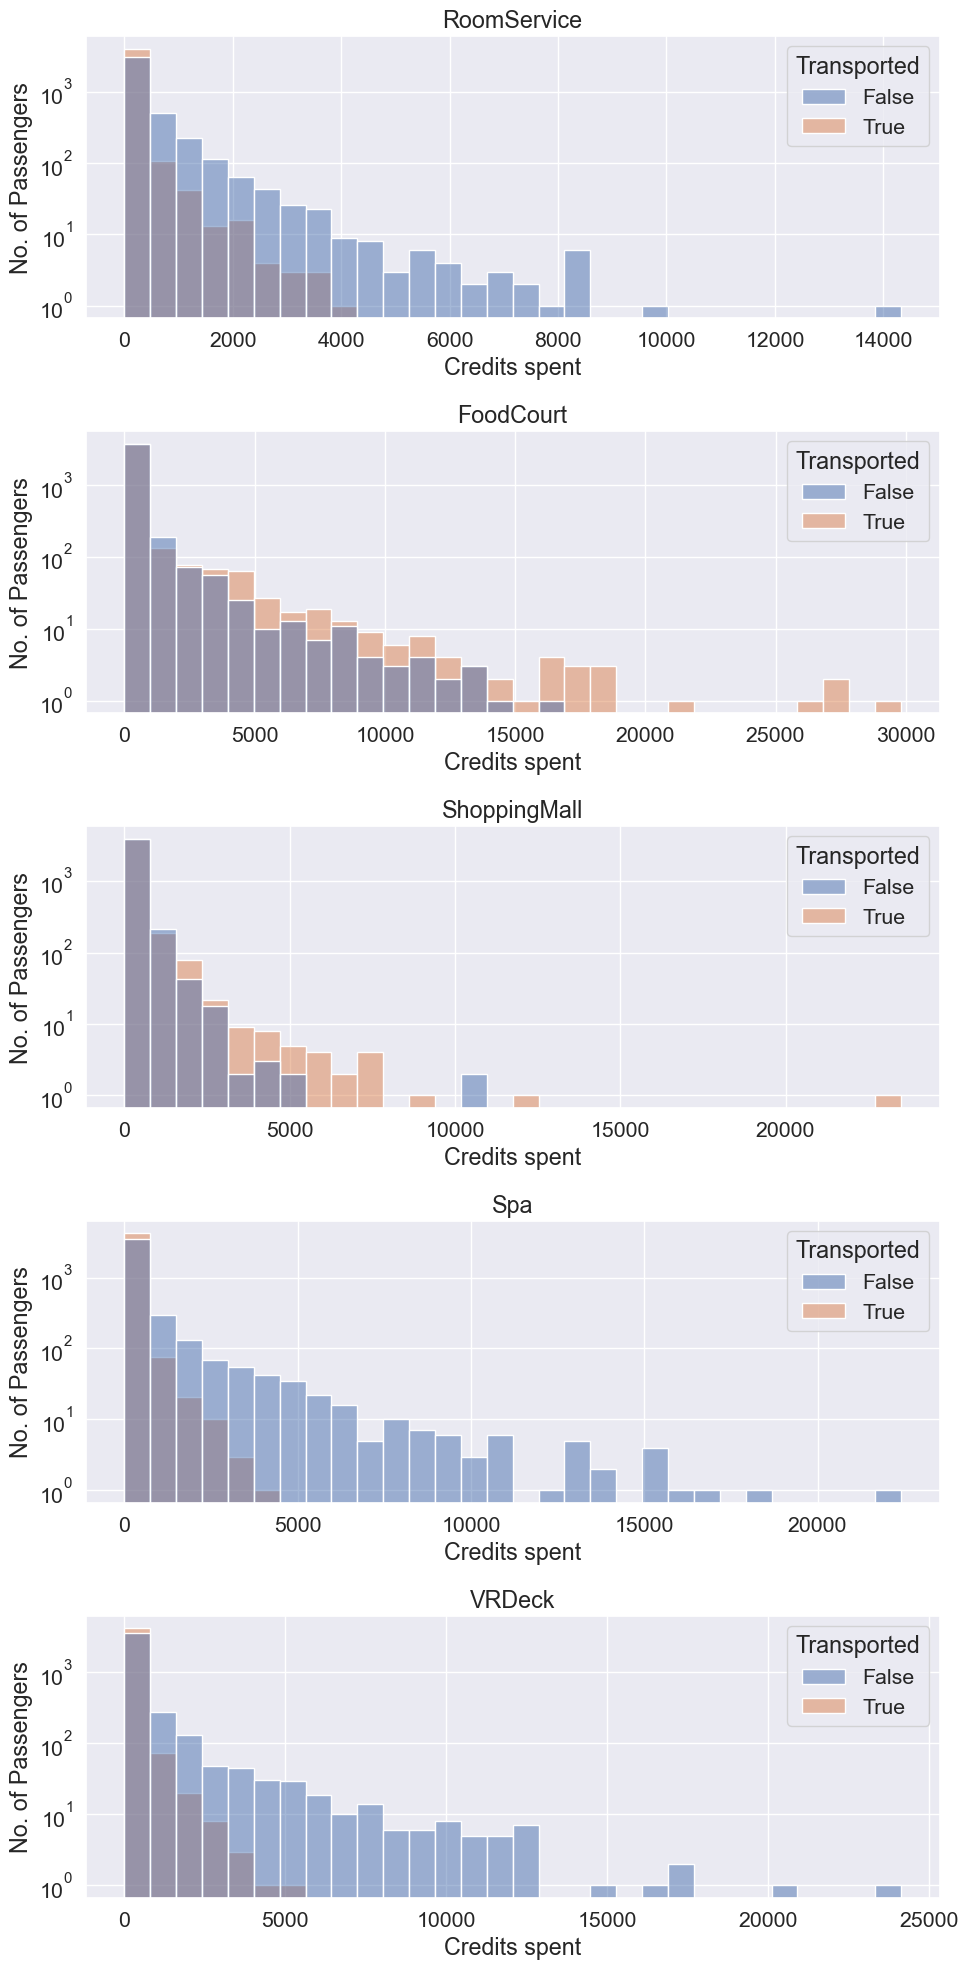

In [24]:
# Credit spending features
total_spent=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(total_spent):
    # Left plot
    ax=fig.add_subplot(5,1,i+1)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    ax.set_yscale('log')  # Setting y-axis to logarithmic scale
    ax.set_xlabel("Credits spent")  
    ax.set_ylabel("No. of Passengers")
    
    
fig.tight_layout()  # Improves appearance a bit
plt.show()

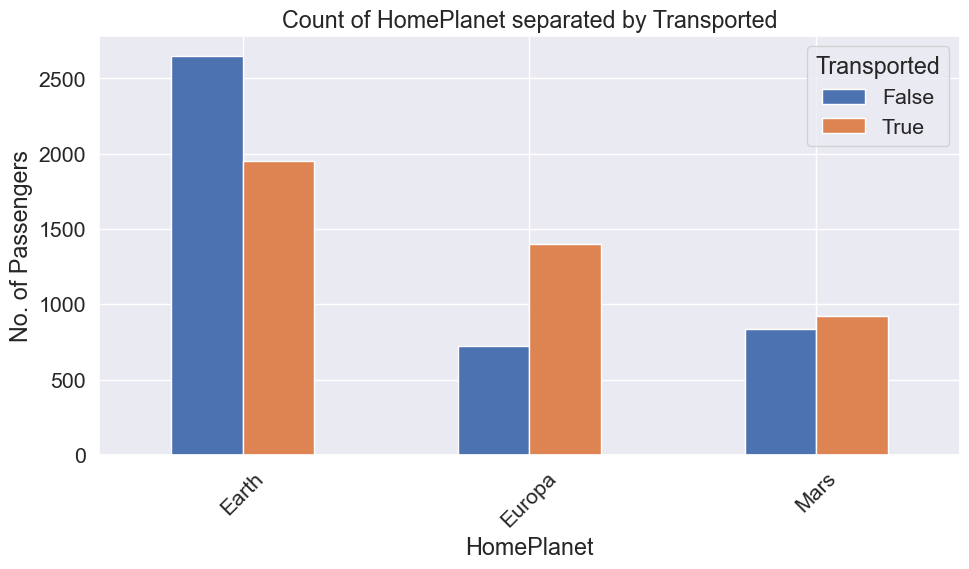

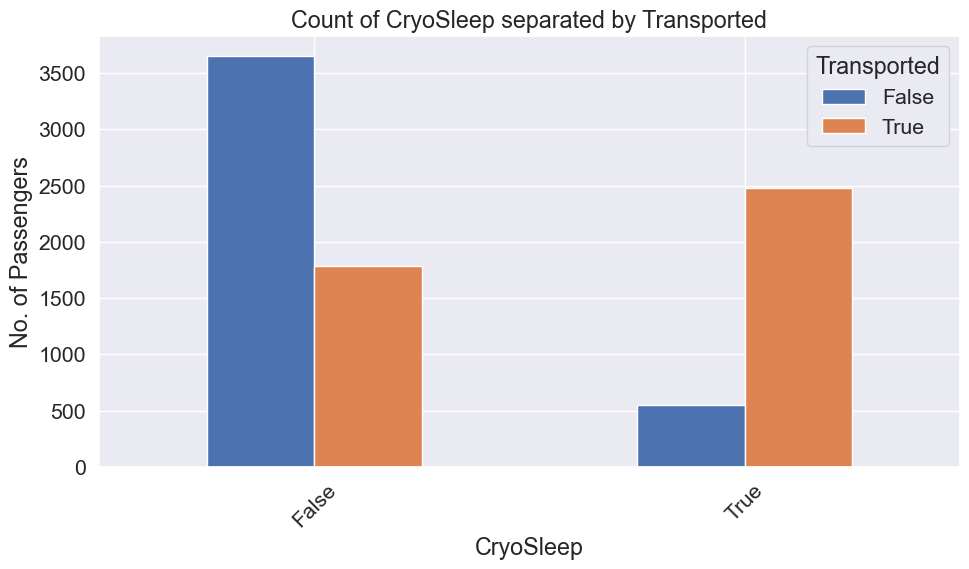

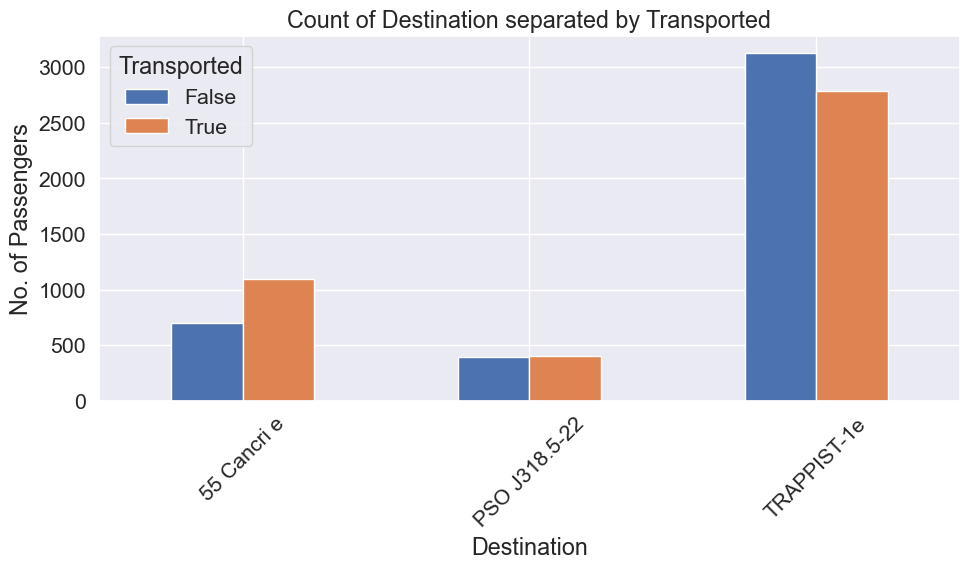

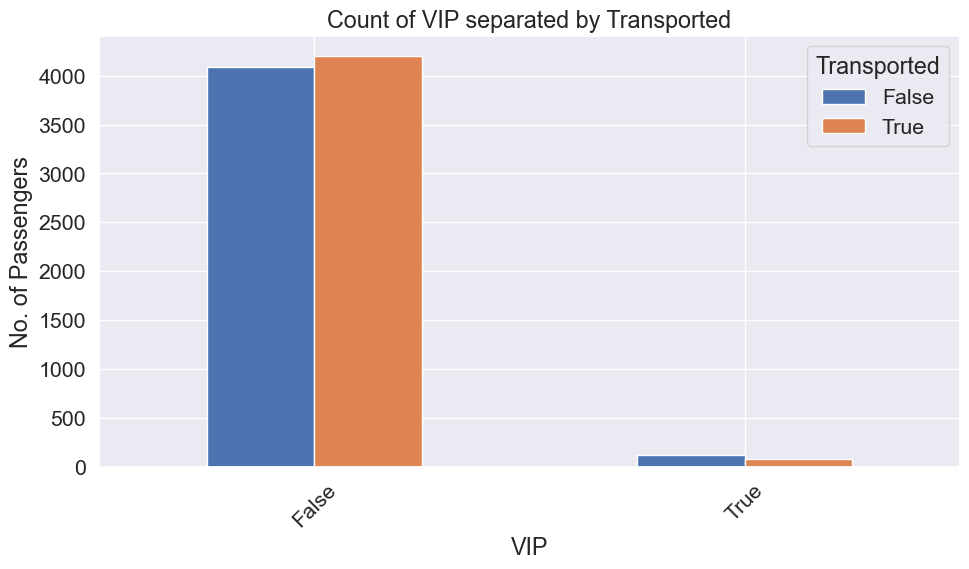

In [25]:
categorial_features=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for i, var in enumerate(categorial_features):
    counts = train_df.groupby([var, 'Transported']).size().unstack()
    counts.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title('Count of ' + var +' separated by Transported')
    plt.xlabel(var)
    plt.ylabel('No. of Passengers')
    plt.xticks(rotation=45)
    plt.legend(title='Transported')
    plt.tight_layout()
    plt.show()


### Combine the train data and test data 
- This allows for easy cleaning on the whole data at once

In [26]:
# Function to combine train and test dataframes
def combine_df(train_df, test_df):
    combined_df = pd.concat([train_df, test_df], ignore_index=True)
    return combined_df
def separate_df(combined_df, train_df_len, test_df_len):
    train_df = combined_df.iloc[:train_df_len]
    test_df = combined_df.iloc[train_df_len:train_df_len + test_df_len]
    return train_df, test_df

# Combine train and test dataframes
full_df = combine_df(train_df, test_df)

### Check for duplicates in the dataset

In [ ]:
def print_duplicates_info(df):
    num_duplicates = df.duplicated().sum()
    percentage_duplicates = np.round(100 * num_duplicates / len(df), 1)
    print(f'Duplicates in dataset: {num_duplicates}, ({percentage_duplicates}%)')

print_duplicates_info(full_df)

Duplicates in dataset: 0, (0.0%)


### Check for null values in the dataset

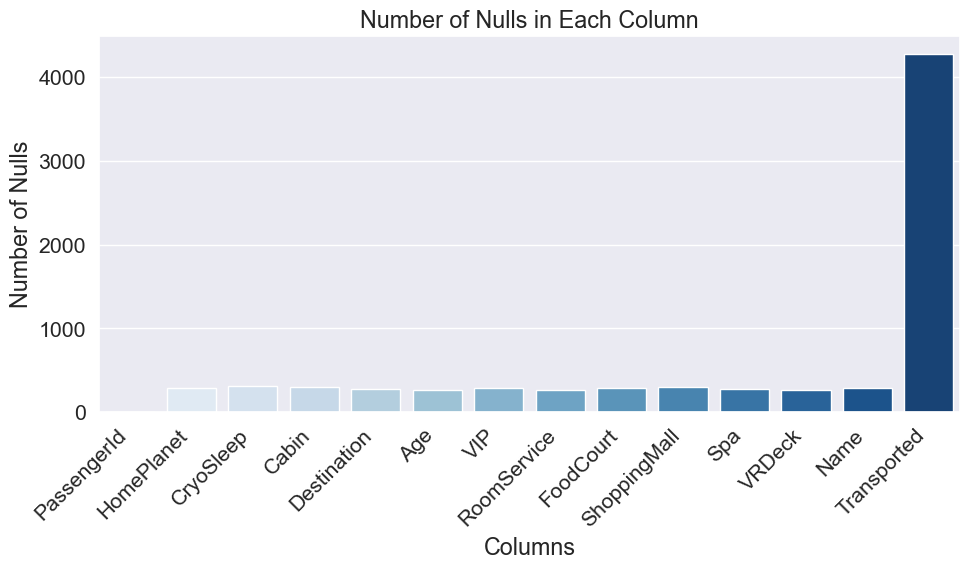

In [29]:
def compute_null_counts(df):
    columns = []
    null_counts = []

    for column in df.columns:
        null_count = df[column].isnull().sum()
        columns.append(column)
        null_counts.append(null_count)

    null_data = pd.DataFrame({'Column': columns, 'Null Count': null_counts})
    return null_data

def plot_null_counts(null_data):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=null_data, x='Column', y='Null Count', palette='Blues')
    plt.xlabel('Columns')
    plt.ylabel('Number of Nulls')
    plt.title('Number of Nulls in Each Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

null_data = compute_null_counts(full_df)
plot_null_counts(null_data)

### Note: To get a clear comparison, transported column is removed 

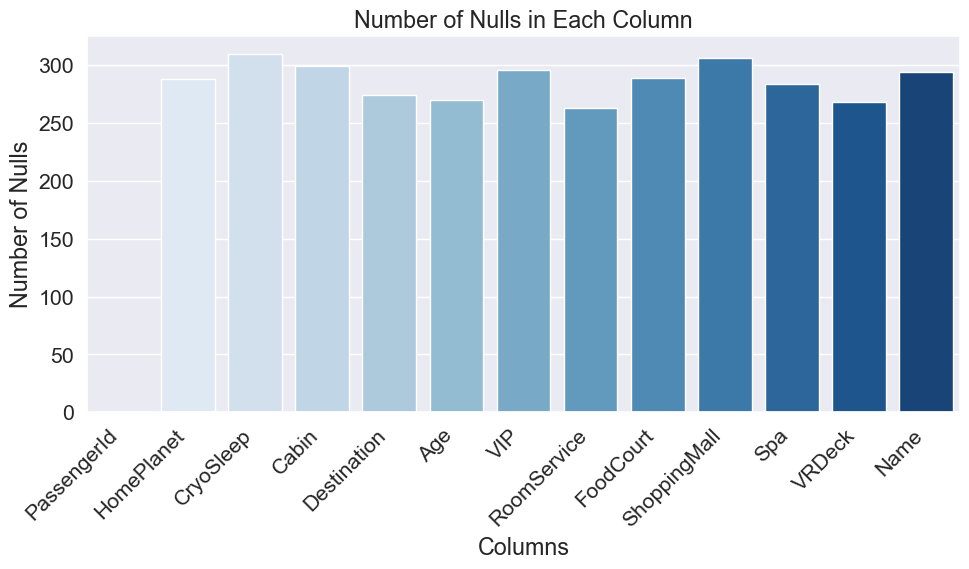

In [ ]:
def compute_null_counts_without_transported(df):
    columns = []
    null_counts = []

    for column in df.columns:
        if column != 'Transported':  # Skip the 'Transported' column because we
            null_count = df[column].isnull().sum()
            columns.append(column)
            null_counts.append(null_count)

    null_data = pd.DataFrame({'Column': columns, 'Null Count': null_counts})
    return null_data

null_data_without_transported = compute_null_counts_without_transported(full_df)
plot_null_counts(null_data_without_transported)

### Looking at the null values in the dataset as a percentage
- Computing the percentages of the null values in the data provides insights to the completeness of the dataset
- it helps to understand the proportion of missing values to the whole data and how much of an effect it can have to the overall training of the data

In [31]:
def compute_null_percentages(df):
    total_rows = len(df)
    columns = []
    null_percentages = []

    for column in df.columns:
        if column != 'Transported':
            null_count = df[column].isnull().sum()
            null_percentage = (null_count / total_rows) * 100
            columns.append(column)
            null_percentages.append(null_percentage)

    null_percentage_data = pd.DataFrame({'Column': columns, 'Null Percentage': null_percentages})
    return null_percentage_data

null_percentage_data = compute_null_percentages(full_df)
print(null_percentage_data)

          Column  Null Percentage
0    PassengerId         0.000000
1     HomePlanet         2.220509
2      CryoSleep         2.390131
3          Cabin         2.305320
4    Destination         2.112567
5            Age         2.081727
6            VIP         2.282190
7    RoomService         2.027756
8      FoodCourt         2.228219
9   ShoppingMall         2.359291
10           Spa         2.189668
11        VRDeck         2.066307
12          Name         2.266769


## Different Approach on working out Null Values for Different Models

### Rationale:
- different models achieve different accuracies based on how the data is cleaned
- the three approaches below show how cleaning of data was considered
- based on numerous testing, specific models used different cleaning approaches which gave higher accuracies

### Creating different data frames to peform different cleaning methods on

In [32]:
df1=full_df
dfAidan=full_df

df4=full_df
df5=full_df
df6=full_df
df7=full_df

In [33]:
dfErnest=full_df

## Filling Null Categorical Variables with Mode and Numerical Variables with Mean

This function fills null values in categorical variables of a DataFrame with the mode of each column.

### Parameters:
- `df`: DataFrame: The DataFrame containing categorical variables with null values.
- `categorical_variables`: list: List of categorical variable names.


In [35]:
def filling_null_categorical_vars_with_mode(df,categorical_variables):
    for cat_col in categorical_variables:
        if cat_col!="Name":
            df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

def filling_null_numerical_vars_with_mean(df, numerical_variables):
    for num_col in numerical_variables:
        df[num_col] = df[num_col].fillna(df[num_col].mean())
        


## Filling Null Values using KNNImputer and OneHotEncoder

This function fills missing values in a DataFrame using `KNNImputer` for numeric columns and `OneHotEncoder` for categorical columns.

### Parameters:
- `df`: DataFrame: The DataFrame containing missing values.

### Returns:
- `DataFrame`: The DataFrame with missing values filled using KNNImputer and OneHotEncoder.


In [36]:
# Define the function to calculate family size
def calculate_family_size(df):
    df[['FirstName', 'LastName']] = df['Name'].str.split(expand=True)
    cabin_split = df['Cabin'].str.split('/', expand=True)
    cabin_split.columns = ['Deck', 'Room_Number', 'Side']
    df = pd.concat([df, cabin_split], axis=1)
    df.drop(columns=['Cabin', 'Name'], inplace=True)
    
    family_counts = df.groupby(['LastName', 'Room_Number'])['LastName'].transform('count')
    df['FamilySize'] = family_counts
    
    return df

# Define the function to remove outliers from the 'Age' column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the mean value of the column
    df.loc[df[column] < lower_bound, column] = df[column].mean()
    df.loc[df[column] > upper_bound, column] = df[column].mean()
    
    return df

# Call the function to calculate family size
dfAidan = calculate_family_size(dfAidan)

# Calculate the mean age before removing outliers
mean_age_outliers = dfAidan['Age'].mean()

# Replace outliers with the mean age
dfAidan = remove_outliers(dfAidan, 'Age')

# Calculate the mean age after removing outliers
mean_age = dfAidan['Age'].mean()

# Print the mean age
print("Mean Age (before removing outliers):", mean_age_outliers)
print("Mean Age (after removing outliers):", mean_age)

Mean Age (before removing outliers): 28.771968503937007
Mean Age (after removing outliers): 28.404402876805754


In [37]:
# Creating interaction features and adding more features
def create_interaction_features(df):
    # Age group
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Elderly'])

    
    # Family survival rate (assuming 'LastName' and 'Room_Number' are available)
    df['Family_Survival_Rate'] = df.groupby(['LastName', 'Room_Number'])['Transported'].transform('mean')

    
    return df

# Create interaction features and additional features
dfAidan = create_interaction_features(dfAidan)

# Display the updated dataframe
dfAidan.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Deck,Room_Number,Side,FamilySize,Age_Group,Family_Survival_Rate
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0,P,1.0,Adult,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0,S,1.0,Young Adult,1.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0,S,2.0,Elderly,0.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0,S,2.0,Adult,0.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1,S,1.0,Child,1.0


In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

def filling_nulls_using_KNNImputer_and_OneHotEncoder(df):
    # Identify columns with missing values
    columns_with_missing = df.columns[df.isnull().any()]
    
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = list(set(columns_with_missing) - set(numeric_cols))
    
    # Apply one-hot encoding to categorical columns
    if categorical_cols:
        df_categorical = df[categorical_cols]
        encoder = OneHotEncoder(drop='if_binary')
        df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df_categorical).toarray())
        df_categorical_encoded.columns = encoder.get_feature_names_out(categorical_cols)
    
    # Fill missing values in numeric columns using KNNImputer
    if len(numeric_cols) != 0:  # Check if numeric_cols is not empty
        imputer = KNNImputer()
        df_numeric = df[numeric_cols]
        df_numeric_filled = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
    
    # Merge filled numeric columns with one-hot encoded categorical columns
    if len(numeric_cols) != 0 and len(categorical_cols) != 0:
        df = pd.concat([df_numeric_filled, df_categorical_encoded], axis=1)
    elif len(categorical_cols) != 0:
        df = df_categorical_encoded
    elif len(numeric_cols) != 0:
        df = df_numeric_filled
    
    return df

filling_nulls_using_KNNImputer_and_OneHotEncoder(dfAidan)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,FamilySize,CryoSleep_False,CryoSleep_True,CryoSleep_nan,...,VIP_True,VIP_nan,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0,1.4,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12967,25.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
12968,30.4,0.0,2680.0,0.0,0.0,523.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Filling Null values column by column

- This approach takes an in depth analysis of the missing data and how they relate with other factors
- By cleaning the data column by column offers a greater opportunity of having a good training data


### Filling Null Values in the HomePlanet Column
- We are using the relationship between the Destination and the planet an individual came form

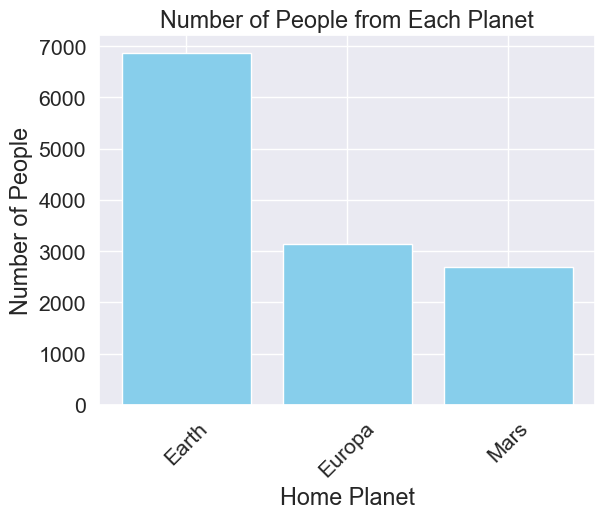

In [39]:
# Create a DataFrame with the count of people from each planet
planet_counts = dfErnest['HomePlanet'].value_counts()

# Plotting
plt.bar(planet_counts.index, planet_counts.values, color='skyblue')
plt.title('Number of People from Each Planet')
plt.xlabel('Home Planet')
plt.ylabel('Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- To see how many possible destinations we have:

In [40]:
print("Number of unique destinations:", dfErnest['Destination'].nunique())


Number of unique destinations: 3


- To see the count of people going to each unique Destination

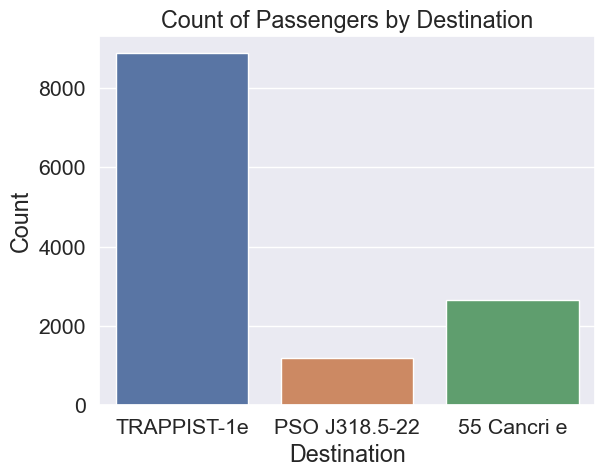

In [41]:
sb.countplot(data=dfErnest, x='Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Count of Passengers by Destination')
plt.show()

### Note: It is clear that more people are going to TRAPPIST-1e, 55 Cancri-e and PSO J318.5-22 respectively

- For each destination, how many people from each planet are going there:

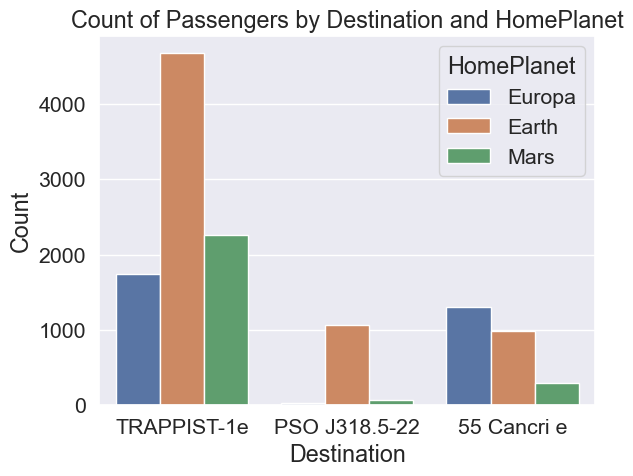

In [42]:

sb.countplot(data=dfErnest, x='Destination', hue='HomePlanet')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Count of Passengers by Destination and HomePlanet')
plt.legend(title='HomePlanet')
plt.show()

- How many people from each planet are VIP or not:

- Group by both HomePlanet and VIP, then count the occurrences

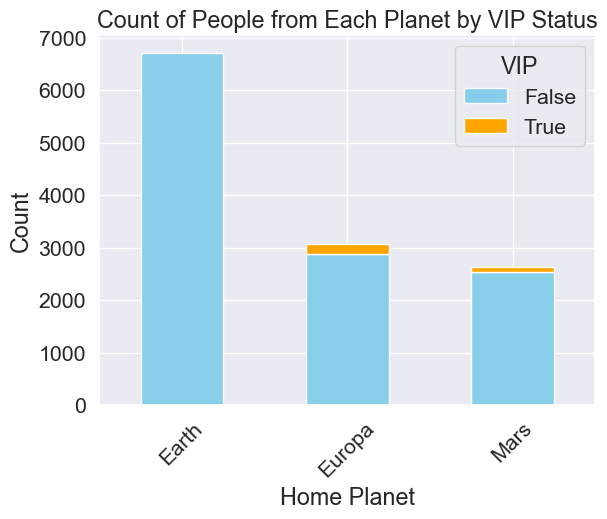

In [43]:
planet_vip_counts = dfErnest.groupby(['HomePlanet', 'VIP']).size().unstack(fill_value=0)

# Plotting
planet_vip_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Count of People from Each Planet by VIP Status')
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='VIP')
plt.show()

- Age distribution of People from each Planet:

In [44]:
grouped = dfErnest.groupby('HomePlanet')['Age']

# Calculate quartiles
quartiles = grouped.describe(percentiles=[0.25, 0.5, 0.75])

# Print quartiles in words
for planet, data in quartiles.iterrows():
    print(f"HomePlanet: {planet}")
    print(f"25th Percentile (Q1): {data['25%']:.2f} years")
    print(f"Median (Q2): {data['50%']:.2f} years")
    print(f"75th Percentile (Q3): {data['75%']:.2f} years")
    print("")


HomePlanet: Earth
25th Percentile (Q1): 18.00 years
Median (Q2): 23.00 years
75th Percentile (Q3): 34.00 years

HomePlanet: Europa
25th Percentile (Q1): 26.00 years
Median (Q2): 33.00 years
75th Percentile (Q3): 42.00 years

HomePlanet: Mars
25th Percentile (Q1): 20.00 years
Median (Q2): 28.00 years
75th Percentile (Q3): 38.00 years



### Note: This probability distribution should still stand even after the imputation!!!

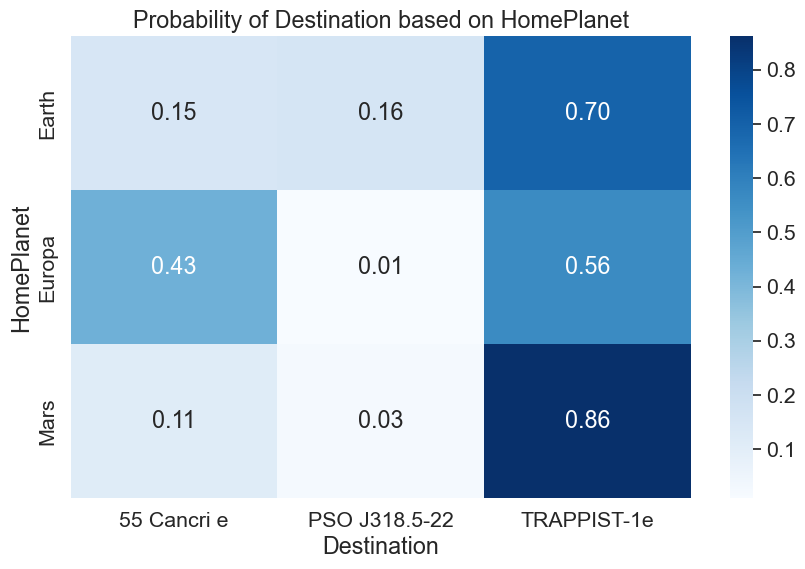

In [45]:
# Count occurrences of each combination of HomePlanet and Destination
counts = dfErnest.groupby(['HomePlanet', 'Destination']).size().unstack(fill_value=0)

# Normalize the counts to get probabilities
probabilities = counts.div(counts.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(probabilities, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Probability of Destination based on HomePlanet')
plt.xlabel('Destination')
plt.ylabel('HomePlanet')
plt.show()

- Check the number of null values in the HomePlanet column

In [47]:
null_count = dfErnest['HomePlanet'].isnull().sum()
print("Number of null values in HomePlanet column:", null_count)

Number of null values in HomePlanet column: 288


- Attempts to Imputate all null values in HomePlanet based on stats

In [48]:
# Function to impute null values in HomePlanet column based on Destination and VIP status
def impute_home_planet(df):
    for index, row in df.iterrows():
        if pd.isnull(row['HomePlanet']):
            if row['Destination'] == 'TRAPPIS-1e' and row['VIP']:
                age = row['Age']
                if age < 26:
                    df.at[index, 'HomePlanet'] = 'Europa'
                else:
                    df.at[index, 'HomePlanet'] = 'Mars'
            elif row['Destination'] == 'PSO J318.5-22':
                df.at[index, 'HomePlanet'] = 'Earth'
            elif row['Destination'] == '55 Cancri e' and not row['VIP']:
                df.at[index, 'HomePlanet'] = 'Earth'
            elif row['Destination'] == '55 Cancri e' and row['VIP']:
                df.at[index, 'HomePlanet'] = 'Europa'
            else:
                df.at[index, 'HomePlanet'] = 'Earth'
    return df

# Apply the function to impute null values in the HomePlanet column
dfErnest = impute_home_planet(dfErnest)



- Check the number of null values in the HomePlanet column

In [50]:
null_count = dfErnest['HomePlanet'].isnull().sum()
print("Number of null values in HomePlanet column:", null_count)


Number of null values in HomePlanet column: 0


- This probability distribution should still stand even after the imputation!!!

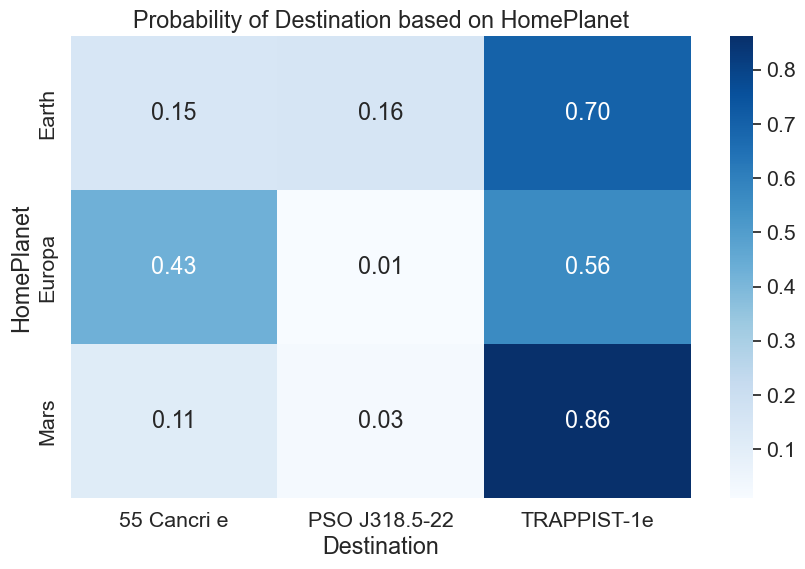

In [51]:
# Count occurrences of each combination of HomePlanet and Destination
counts = dfErnest.groupby(['HomePlanet', 'Destination']).size().unstack(fill_value=0)

# Normalize the counts to get probabilities
probabilities = counts.div(counts.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(probabilities, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.title('Probability of Destination based on HomePlanet')
plt.xlabel('Destination')
plt.ylabel('HomePlanet')
plt.show()

### Filling Null Values in the CryoSleep Column:



- Relate the CryoSleep with Expenditures

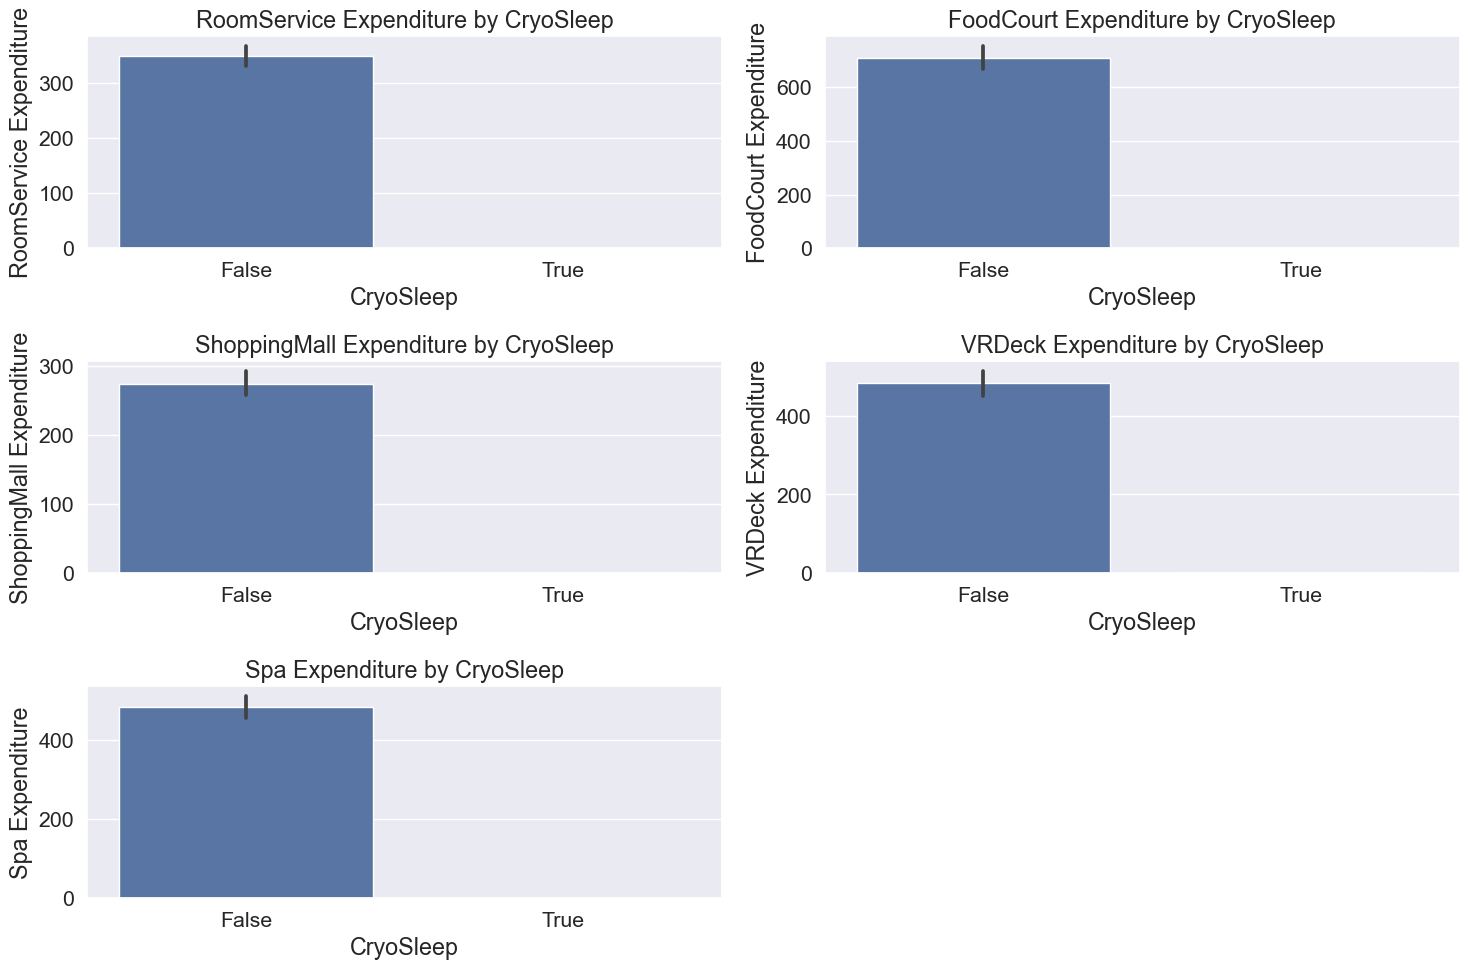

In [53]:
# List of columns
columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa']

# Plotting
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)  # Adjusted indexing
    sb.barplot(x='CryoSleep', y=col, data=dfErnest)
    plt.title(f'{col} Expenditure by CryoSleep')
    plt.xlabel('CryoSleep')
    plt.ylabel(f'{col} Expenditure')
plt.tight_layout()
plt.show()


### Note: We see that When CryoSleep is True, all expenditures are Zero:

In [54]:
# Fill null values in CryoSleep based on the sum of expenditures
dfErnest['CryoSleep'] = dfErnest['CryoSleep'].fillna((dfErnest['RoomService'] + dfErnest['FoodCourt'] + dfErnest['ShoppingMall'] + dfErnest['VRDeck']) == 0)
null_count = dfErnest['CryoSleep'].isnull().sum()
print("Number of null values in CryoSleep column:", null_count)

Number of null values in CryoSleep column: 0


### Filling Null values for the Cabin Number:

In [55]:
nulls_in_name = dfErnest['Cabin'].isnull().sum()
print("Number of null values in the Cabin column:", nulls_in_name)

Number of null values in the Cabin column: 299


In [56]:
nulls_in_name = dfErnest['Name'].isnull().sum()
print("Number of null values in the Name column:", nulls_in_name)

Number of null values in the Name column: 294


In [57]:
# Count the number of null values in Cabin corresponding to null values in Name
null_cabin_null_name_count = dfErnest[dfErnest['Cabin'].isnull() & dfErnest['Name'].isnull()].shape[0]

print("Number of null values in Cabin corresponding to null values in Name:", null_cabin_null_name_count)


Number of null values in Cabin corresponding to null values in Name: 3


In [58]:
# Initialize a counter for group numbers with no other rows having a non-null Cabin number
count_unique_group_numbers = 0

# Iterate over each row with a null value in the Cabin number column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Extract group number from PassengerId
    group_number = row['PassengerId'].split('_')[0]
    
    # Check if there are other rows with the same group number and a non-null Cabin number
    if dfErnest[(dfErnest['PassengerId'].str.split('_').str[0] == group_number) & (~dfErnest['Cabin'].isnull())].empty:
        count_unique_group_numbers += 1

print("Number of group numbers with no other rows having a non-null Cabin number:", count_unique_group_numbers)

Number of group numbers with no other rows having a non-null Cabin number: 162


In [59]:
def fill_null_cabin(df):
    # Extract group numbers from PassengerId for rows with null Cabin values
    null_cabin_groups = df[df['Cabin'].isnull()]['PassengerId'].str.split('_').str[0]
    
    # Iterate over each null Cabin row
    for index, row in df[df['Cabin'].isnull()].iterrows():
        # Get the group number for the current row
        group_number = row['PassengerId'].split('_')[0]
        
        # Find other rows with the same group number and non-null Cabin values
        similar_group_rows = df[(df['PassengerId'].str.split('_').str[0] == group_number) & (~df['Cabin'].isnull())]
        
        # If there are similar group rows, fill the null Cabin value with the first non-null Cabin value
        if not similar_group_rows.empty:
            df.at[index, 'Cabin'] = similar_group_rows.iloc[0]['Cabin']
    
    return df

# Apply the fill_null_cabin function
dfErnest = fill_null_cabin(dfErnest)


### Note: Rationale
- For every null value in the Cabin column, i want check the corresponding group number(gggg) in 
- the PassengerId column. Then check if there are any other similiar group numbers(gggg) in the 
- PassengerId column with the non-null corresponding values in Cabin column. If so, give that null 
- value the same Cabin value as those having the same group number

In [60]:
nulls_in_name = dfErnest['Cabin'].isnull().sum()
print("Number of null values in the Cabin column:", nulls_in_name)

Number of null values in the Cabin column: 162


In [61]:
# Count the number of null values in Cabin corresponding to null values in Name
null_cabin_null_name_count = dfErnest[dfErnest['Cabin'].isnull() & dfErnest['Name'].isnull()].shape[0]

print("Number of null values in Cabin corresponding to null values in Name:", null_cabin_null_name_count)

Number of null values in Cabin corresponding to null values in Name: 1


In [62]:
# Initialize a counter for unique last names with no other rows having a non-null Cabin number
count_unique_last_names = 0

# Iterate over each row with a null value in the Cabin number column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Check if the 'Name' column is not null
    if not pd.isnull(row['Name']):
        # Extract the last name from the Name column
        last_name = row['Name'].split()[-1]
    
    # Check if there are other rows with the same last name and a non-null Cabin number
    if dfErnest[(dfErnest['Name'].str.split().str[-1] == last_name) & (~dfErnest['Cabin'].isnull())].empty:
        count_unique_last_names += 1
    
print("Number of unique last names with no other rows having a non-null Cabin number:", count_unique_last_names)

Number of unique last names with no other rows having a non-null Cabin number: 4


In [63]:
# Iterate over each row with a null value in the Cabin number column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Check if the 'Name' column is not null
    if not pd.isnull(row['Name']):
        # Extract the last name from the Name column
        last_name = row['Name'].split()[-1]
    
    # Find other rows with the same last name and a non-null Cabin number
    matching_rows = dfErnest[(dfErnest['Name'].str.split().str[-1] == last_name) & (~dfErnest['Cabin'].isnull())]
    
    # Check if there are any matching rows
    if not matching_rows.empty:
        # Get the Cabin number from the first matching row
        cabin_number = matching_rows.iloc[0]['Cabin']
        
        # Fill in the null value in the Cabin column with the found Cabin number
        dfErnest.at[index, 'Cabin'] = cabin_number
        

### Note: Rationale
- This code iterates over each row with a null value in the Cabin column, 
- extracts the last name from the corresponding Name column,
- finds other rows with the same last name and a non-null Cabin number, and
- fills in the null value in the Cabin column with the found Cabin number.

In [64]:
nulls_in_name = dfErnest['Cabin'].isnull().sum()
print("Number of null values in the Cabin column:", nulls_in_name)

Number of null values in the Cabin column: 4


In [65]:
nulls_in_name = dfErnest['Name'].isnull().sum()
print("Number of null values in the Name column:", nulls_in_name)

Number of null values in the Name column: 294


In [66]:
# Iterate over each row with a null value in the Name column
for index, row in dfErnest[dfErnest['Name'].isnull()].iterrows():
    # Extract the Cabin number from the corresponding Cabin column
    cabin_number = row['Cabin']
    
    # Find other rows with the same Cabin number and a non-null Name
    matching_rows = dfErnest[(dfErnest['Cabin'] == cabin_number) & (~dfErnest['Name'].isnull())]
    
    # Check if there are any matching rows
    if not matching_rows.empty:
        # Get the first matching row
        matching_row = matching_rows.iloc[0]
        
        # Extract the last name from the non-null Name value
        last_name = matching_row['Name'].split()[-1]
        
        # Fill in the null value in the Name column with the generated name
        dfErnest.at[index, 'Name'] = "Firstname A " + last_name


In [67]:
# Iterate over each row with a null value in the Name column
for index, row in dfErnest[dfErnest['Name'].isnull()].iterrows():
    # Extract the group number (gggg) from the corresponding PassengerId column
    group_number = row['PassengerId'].split('_')[0]
    
    # Find other rows with the same group number and a non-null Name
    matching_rows = dfErnest[(dfErnest['PassengerId'].str.split('_').str[0] == group_number) & (~dfErnest['Name'].isnull())]
    
    # Check if there are any matching rows
    if not matching_rows.empty:
        # Get the first matching row
        matching_row = matching_rows.iloc[0]
        
        # Extract the last name from the non-null Name value
        last_name = matching_row['Name'].split()[-1]
        
        # Fill in the null value in the Name column with the generated name
        dfErnest.at[index, 'Name'] = "Firstname A " + last_name


In [68]:
nulls_in_name = dfErnest['Name'].isnull().sum()
print("Number of null values in the Name column:", nulls_in_name)

Number of null values in the Name column: 154


In [69]:
# Initialize a counter for unique last names with no other rows having a non-null Cabin number
count_unique_last_names = 0

# Iterate over each row with a null value in the Cabin number column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Check if the 'Name' column is not null
    if not pd.isnull(row['Name']):
        # Extract the last name from the Name column
        last_name = row['Name'].split()[-1]
    
    # Check if there are other rows with the same last name and a non-null Cabin number
    if dfErnest[(dfErnest['Name'].str.split().str[-1] == last_name) & (~dfErnest['Cabin'].isnull())].empty:
        count_unique_last_names += 1

print("Number of unique last names with no other rows having a non-null Cabin number:", count_unique_last_names)

Number of unique last names with no other rows having a non-null Cabin number: 4


In [70]:
# Initialize a counter for group numbers with no other rows having a non-null Cabin number
count_unique_group_numbers = 0

# Iterate over each row with a null value in the Cabin number column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Extract group number from PassengerId
    group_number = row['PassengerId'].split('_')[0]
    
    # Check if there are other rows with the same group number and a non-null Cabin number
    if dfErnest[(dfErnest['PassengerId'].str.split('_').str[0] == group_number) & (~dfErnest['Cabin'].isnull())].empty:
        count_unique_group_numbers += 1

print("Number of group numbers with no other rows having a non-null Cabin number:", count_unique_group_numbers)

Number of group numbers with no other rows having a non-null Cabin number: 4


In [71]:
# Iterate over each row with a null value in the Cabin column
for index, row in dfErnest[dfErnest['Cabin'].isnull()].iterrows():
    # Print the PassengerId and Name for the current row
    print("PassengerId:", row['PassengerId'], "Name:", row['Name'])

PassengerId: 0502_01 Name: Pigars Swell
PassengerId: 2117_01 Name: Azet Rocketedy
PassengerId: 3553_01 Name: Wafox Maie
PassengerId: 6385_01 Name: Possh Duncy


In [72]:
# Drop rows with null values in the Cabin column
dfErnest.dropna(subset=['Cabin'], inplace=True)

In [73]:
nulls_in_name = dfErnest['Cabin'].isnull().sum()
print("Number of null values in the Cabin column:", nulls_in_name)

Number of null values in the Cabin column: 0


### Filling Null values in VIP

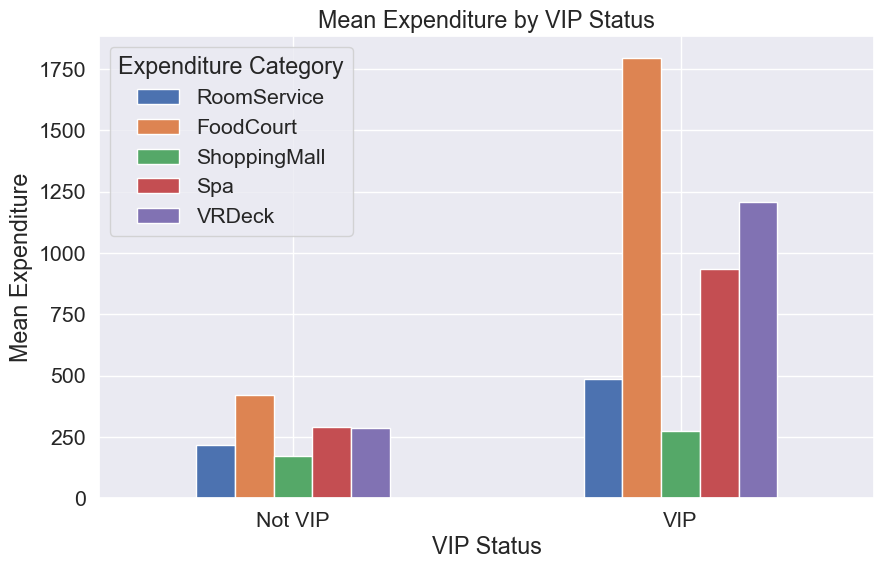

In [74]:
# Group by VIP and calculate the mean expenditure for each category
expenditure_means = dfErnest.groupby('VIP')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

# Plot the bar graph
expenditure_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Expenditure by VIP Status')
plt.xlabel('VIP Status')
plt.ylabel('Mean Expenditure')
plt.xticks(ticks=[0, 1], labels=['Not VIP', 'VIP'], rotation=0)
plt.legend(title='Expenditure Category')
plt.show()

In [75]:
# Define a function to predict the VIP status based on expenditure and HomePlanet
def predict_vip(row):
    if row['VRDeck'] > row['Spa']:
        return True
    elif row['Spa'] > row['VRDeck']:
        return False
    else:
        if row['HomePlanet'] == 'Earth':
            return False
        elif row['HomePlanet'] == 'Europa':
            return True
        elif row['HomePlanet'] == 'Mars':
            return True  # If HomePlanet is Mars, VIP should be True
        else:
            return None  # Return None for other cases

# Apply the function to rows with null values in the VIP column
dfErnest.loc[dfErnest['VIP'].isnull(), 'VIP'] = dfErnest[dfErnest['VIP'].isnull()].apply(predict_vip, axis=1)



In [76]:
null_vip_count = dfErnest['VIP'].isnull().sum()
print("Number of null values in the VIP column:", null_vip_count)


Number of null values in the VIP column: 0


### Filling null values in the Destination column

- For each destination, how many people from each planet are going there:

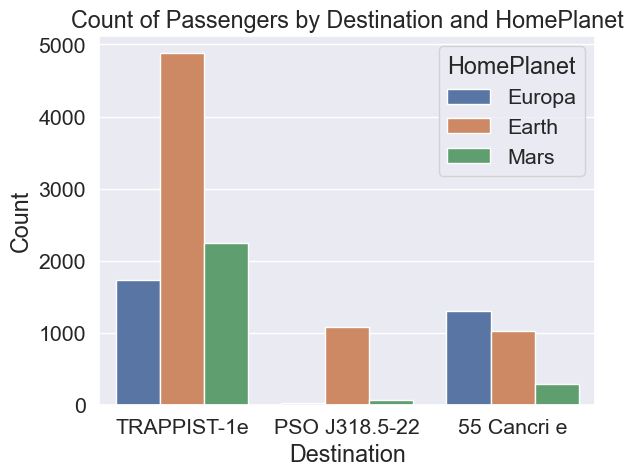

In [77]:
sb.countplot(data=dfErnest, x='Destination', hue='HomePlanet')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Count of Passengers by Destination and HomePlanet')
plt.legend(title='HomePlanet')
plt.show()

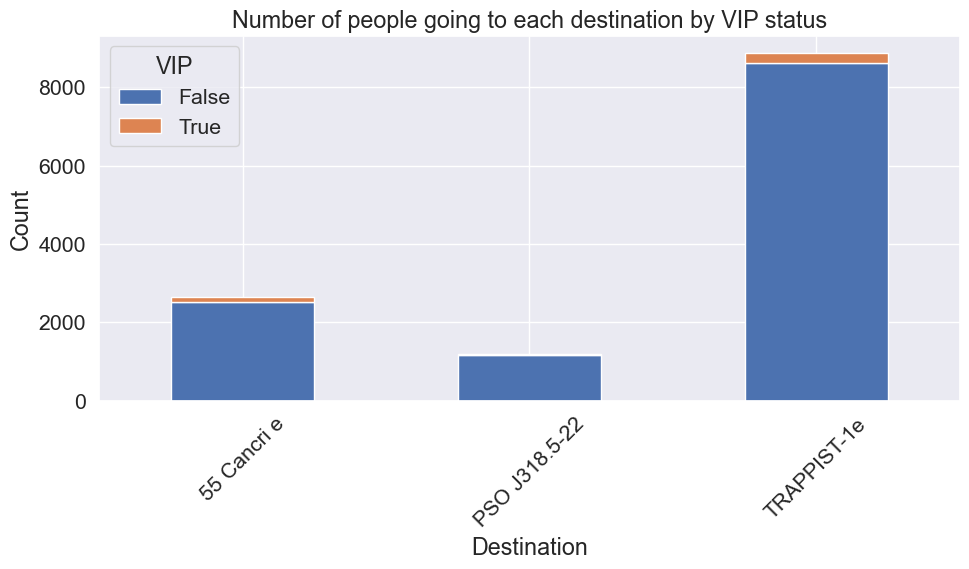

In [78]:
# Group data by Destination and VIP
destination_vip_counts = dfErnest.groupby(['Destination', 'VIP']).size().unstack(fill_value=0)

# Plot the data
destination_vip_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Number of people going to each destination by VIP status')

# Show the plot
plt.legend(title='VIP')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [79]:
# Fill null values in Destination based on HomePlanet and VIP status
dfErnest.loc[(dfErnest['HomePlanet'] == 'Earth') & (dfErnest['VIP'] == False) & (dfErnest['Destination'].isnull()), 'Destination'] = 'PSO J318.5-22'
dfErnest.loc[(dfErnest['HomePlanet'] == 'Earth') & (dfErnest['VIP'] == True) & (dfErnest['Destination'].isnull()), 'Destination'] = 'TRAPPIST-1e'
dfErnest.loc[(dfErnest['HomePlanet'] == 'Europa') & (dfErnest['VIP'] == False) & (dfErnest['Destination'].isnull()), 'Destination'] = '55 Cancri e'
dfErnest.loc[(dfErnest['HomePlanet'] == 'Europa') & (dfErnest['VIP'] == True) & (dfErnest['Destination'].isnull()), 'Destination'] = 'TRAPPIST-1e'
dfErnest.loc[(dfErnest['HomePlanet'] == 'Mars') & (dfErnest['VIP'] == False) & (dfErnest['Destination'].isnull()), 'Destination'] = '55 Cancri e'
dfErnest.loc[(dfErnest['HomePlanet'] == 'Mars') & (dfErnest['VIP'] == True) & (dfErnest['Destination'].isnull()), 'Destination'] = 'TRAPPIST-1e'


In [80]:
# Count the number of null values in the Destination column
null_destinations = dfErnest['Destination'].isnull().sum()
print("Number of null values in the Destination column:", null_destinations)


Number of null values in the Destination column: 0


In [81]:
# Count the number of null values in the Destination column where VIP column is also null
null_destinations_vip = dfErnest[dfErnest['Destination'].isnull() & dfErnest['VIP'].isnull()].shape[0]
print("Number of null values in the Destination column corresponding to null values in the VIP column:", null_destinations_vip)


Number of null values in the Destination column corresponding to null values in the VIP column: 0


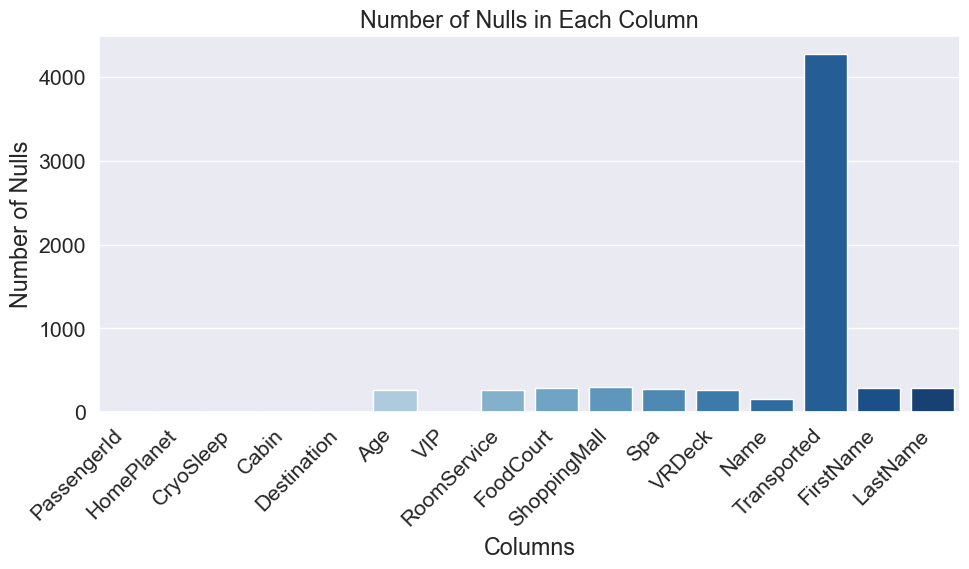

In [82]:
def null_updates_in_dataframe(df):
    # Create empty lists to store column names and null counts
    columns = []
    null_counts = []

    # Iterate over each column and append the column name and null count to the lists
    for column in df.columns:
        null_count = df[column].isnull().sum()
        columns.append(column)
        null_counts.append(null_count)

    # Create a DataFrame from the lists
    null_data = pd.DataFrame({'Column': columns, 'Null Count': null_counts})

    # Plotting
    plt.figure(figsize=(10, 6))
    sb.barplot(data=null_data, x='Column', y='Null Count', palette='Blues')
    plt.xlabel('Columns')
    plt.ylabel('Number of Nulls')
    plt.title('Number of Nulls in Each Column')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
    
null_updates_in_dataframe(dfErnest)

### Filling null values for the Age:

- Age distribution of People from each Planet:

In [83]:
grouped = dfErnest.groupby('HomePlanet')['Age']

# Calculate quartiles
quartiles = grouped.describe(percentiles=[0.25, 0.5, 0.75])

# Print quartiles in words
for planet, data in quartiles.iterrows():
    print(f"HomePlanet: {planet}")
    print(f"25th Percentile (Q1): {data['25%']:.2f} years")
    print(f"Median (Q2): {data['50%']:.2f} years")
    print(f"75th Percentile (Q3): {data['75%']:.2f} years")
    print("")

HomePlanet: Earth
25th Percentile (Q1): 18.00 years
Median (Q2): 23.00 years
75th Percentile (Q3): 35.00 years

HomePlanet: Europa
25th Percentile (Q1): 26.00 years
Median (Q2): 33.00 years
75th Percentile (Q3): 42.00 years

HomePlanet: Mars
25th Percentile (Q1): 20.00 years
Median (Q2): 28.00 years
75th Percentile (Q3): 38.00 years



In [84]:
null_age_with_zero_spa = dfErnest[dfErnest['Spa'] == 0]['Age'].isnull().sum()
print("Number of null values in the Age column corresponding to Spa being 0:", null_age_with_zero_spa)

Number of null values in the Age column corresponding to Spa being 0: 172


In [85]:
# Impute null values in Age column where Spa expenditure is 0 with 6
dfErnest.loc[(dfErnest['Age'].isnull()) & (dfErnest['Spa'] == 0), 'Age'] = 6

In [86]:
null_vip_count = dfErnest['Age'].isnull().sum()
print("Number of null values in the Age column:", null_vip_count)

Number of null values in the Age column: 98


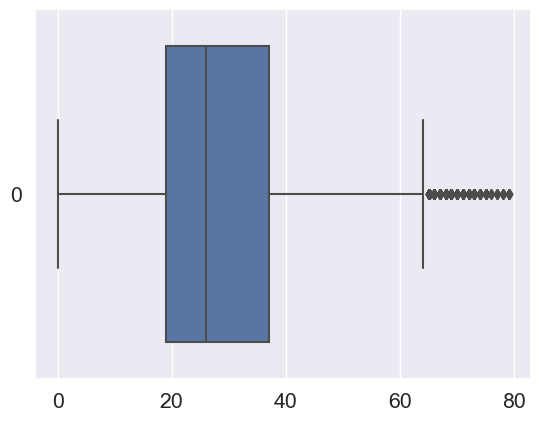

In [87]:
#Imputing 'Age' null values, but first consider outliers

sb.boxplot(dfErnest['Age'],orient='h')
plt.show()

In [88]:
#For training data:
temp = dfErnest[dfErnest['Age'] < 61]['Age'].mean()
dfErnest['Age'] = dfErnest['Age'].fillna(temp)

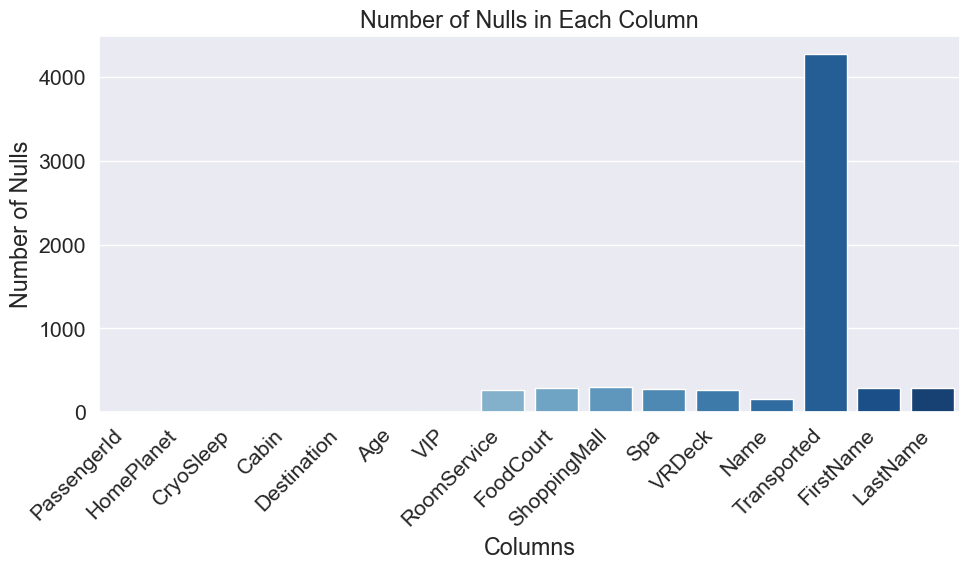

In [89]:
null_updates_in_dataframe(dfErnest)

### Filling null values for RoomService column: 

In [90]:
## Calculate summary statistics for RoomService expenditure for VIP and non-VIP individuals
vip_roomservice_stats = dfErnest[dfErnest['VIP'] == True]['RoomService'].describe()
non_vip_roomservice_stats = dfErnest[dfErnest['VIP'] == False]['RoomService'].describe()

# Display the summary statistics
print("Summary statistics for RoomService expenditure among VIP individuals:")
print(vip_roomservice_stats)
print("\nSummary statistics for RoomService expenditure among non-VIP individuals:")
print(non_vip_roomservice_stats)

Summary statistics for RoomService expenditure among VIP individuals:
count     407.000000
mean      397.862408
std       935.836277
min         0.000000
25%         0.000000
50%         0.000000
75%       402.000000
max      8243.000000
Name: RoomService, dtype: float64

Summary statistics for RoomService expenditure among non-VIP individuals:
count    12296.000000
mean       217.142567
std        635.152638
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      14327.000000
Name: RoomService, dtype: float64


## Function: calculate_outlier_bounds

Calculate lower and upper bounds for outlier detection using the Interquartile Range (IQR) method.

### Parameters:
- **column (pandas Series):** A pandas Series representing the column for which bounds are to be calculated.

### Returns:
- **float, float:** Lower and upper bounds for outlier detection.

### Example Usage:
```python
lower_bound, upper_bound = calculate_outlier_bounds(df['Column'])


In [91]:
def calculate_outlier_bounds(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound


- Remove outliers for RoomService expenditures

In [92]:
lower_bound, upper_bound = calculate_outlier_bounds(dfErnest['RoomService'])
df_cleaned = dfErnest[(dfErnest['RoomService'] >= lower_bound) & (dfErnest['RoomService'] <= upper_bound)]

# Calculate mean and median based on VIP status
mean_vip = df_cleaned[df_cleaned['VIP'] == True]['RoomService'].mean()
median_vip = df_cleaned[df_cleaned['VIP'] == True]['RoomService'].median()

mean_non_vip = df_cleaned[df_cleaned['VIP'] == False]['RoomService'].mean()
median_non_vip = df_cleaned[df_cleaned['VIP'] == False]['RoomService'].median()

# Fill null values based on mean and median
dfErnest.loc[(dfErnest['VIP'] == True) & (dfErnest['RoomService'].isnull()), 'RoomService'] = mean_vip
dfErnest.loc[(dfErnest['VIP'] == False) & (dfErnest['RoomService'].isnull()), 'RoomService'] = mean_non_vip


In [93]:
null_vip_count = dfErnest['RoomService'].isnull().sum()
print("Number of null values in the RoomService column:", null_vip_count)

Number of null values in the RoomService column: 0


### Filling null values For FoodCourt 

In [94]:
## Calculate summary statistics for FoodCourt expenditure for VIP and non-VIP individuals
vip_foodcourt_stats = dfErnest[dfErnest['VIP'] == True]['FoodCourt'].describe()
non_vip_foodcourt_stats = dfErnest[dfErnest['VIP'] == False]['FoodCourt'].describe()

# Display the summary statistics
print("Summary statistics for FoodCourt expenditure among VIP individuals:")
print(vip_foodcourt_stats)
print("\nSummary statistics for FoodCourt expenditure among non-VIP individuals:")
print(non_vip_foodcourt_stats)

Summary statistics for FoodCourt expenditure among VIP individuals:
count      405.000000
mean      1469.634568
std       3574.431548
min          0.000000
25%          0.000000
50%         13.000000
75%       1260.000000
max      29813.000000
Name: FoodCourt, dtype: float64

Summary statistics for FoodCourt expenditure among non-VIP individuals:
count    12272.000000
mean       417.813396
std       1460.235486
min          0.000000
25%          0.000000
50%          0.000000
75%         60.000000
max      27071.000000
Name: FoodCourt, dtype: float64


- Remove outliers for FoodCourt expenditures

In [95]:
lower_bound, upper_bound = calculate_outlier_bounds(dfErnest['FoodCourt'])
df_cleaned = dfErnest[(dfErnest['FoodCourt'] >= lower_bound) & (dfErnest['FoodCourt'] <= upper_bound)]

# Calculate mean and median based on VIP status
mean_vip = df_cleaned[df_cleaned['VIP'] == True]['FoodCourt'].mean()
median_vip = df_cleaned[df_cleaned['VIP'] == True]['FoodCourt'].median()

mean_non_vip = df_cleaned[df_cleaned['VIP'] == False]['FoodCourt'].mean()
median_non_vip = df_cleaned[df_cleaned['VIP'] == False]['FoodCourt'].median()

# Fill null values based on mean and median
dfErnest.loc[(dfErnest['VIP'] == True) & (dfErnest['FoodCourt'].isnull()), 'FoodCourt'] = mean_vip
dfErnest.loc[(dfErnest['VIP'] == False) & (dfErnest['FoodCourt'].isnull()), 'FoodCourt'] = mean_non_vip



In [96]:
null_vip_count = dfErnest['FoodCourt'].isnull().sum()
print("Number of null values in the FoodCourt column:", null_vip_count)

Number of null values in the FoodCourt column: 0


### Filling null values For ShoppingMall: 

In [97]:
## Summary statistics for ShoppingMall expenditure among VIP individuals
vip_shopping_stats = dfErnest[dfErnest['VIP'] == True]['ShoppingMall'].describe()
print("Summary statistics for ShoppingMall expenditure among VIP individuals:")
print(vip_shopping_stats)
print()

# Summary statistics for ShoppingMall expenditure among non-VIP individuals
non_vip_shopping_stats = dfErnest[dfErnest['VIP'] == False]['ShoppingMall'].describe()
print("Summary statistics for ShoppingMall expenditure among non-VIP individuals:")
print(non_vip_shopping_stats)


Summary statistics for ShoppingMall expenditure among VIP individuals:
count     405.000000
mean      218.175309
std       517.679525
min         0.000000
25%         0.000000
50%         0.000000
75%       130.000000
max      3700.000000
Name: ShoppingMall, dtype: float64

Summary statistics for ShoppingMall expenditure among non-VIP individuals:
count    12255.000000
mean       173.432069
std        592.838097
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


- Remove outliers for ShoppingMall expenditures 

In [98]:
lower_bound, upper_bound = calculate_outlier_bounds(dfErnest['ShoppingMall'])
df_cleaned = dfErnest[(dfErnest['ShoppingMall'] >= lower_bound) & (dfErnest['ShoppingMall'] <= upper_bound)]

# Calculate mean and median based on VIP status
mean_vip = df_cleaned[df_cleaned['VIP'] == True]['ShoppingMall'].mean()
median_vip = df_cleaned[df_cleaned['VIP'] == True]['ShoppingMall'].median()

mean_non_vip = df_cleaned[df_cleaned['VIP'] == False]['ShoppingMall'].mean()
median_non_vip = df_cleaned[df_cleaned['VIP'] == False]['ShoppingMall'].median()

# Fill null values based on mean and median
dfErnest.loc[(dfErnest['VIP'] == True) & (dfErnest['ShoppingMall'].isnull()), 'ShoppingMall'] = mean_vip
dfErnest.loc[(dfErnest['VIP'] == False) & (dfErnest['ShoppingMall'].isnull()), 'ShoppingMall'] = mean_non_vip


In [99]:
null_vip_count = dfErnest['ShoppingMall'].isnull().sum()
print("Number of null values in the ShoppingMall column:", null_vip_count)

Number of null values in the ShoppingMall column: 0


### Filling null values for Spa column 

In [100]:
# Removing outliers from the 'Spa' column using the Interquartile Range (IQR) method
lower_bound, upper_bound = calculate_outlier_bounds(dfErnest['Spa'])

# Filter out rows with Spa expenditure outside the IQR range
filtered_df = dfErnest[(dfErnest['Spa'] >= lower_bound) & (dfErnest['Spa'] <= upper_bound)]

# Calculate mean and median of Spa expenditures for VIP and non-VIP individuals
mean_spa_vip = filtered_df[filtered_df['VIP'] == True]['Spa'].mean()
median_spa_vip = filtered_df[filtered_df['VIP'] == True]['Spa'].median()
mean_spa_non_vip = filtered_df[filtered_df['VIP'] == False]['Spa'].mean()
median_spa_non_vip = filtered_df[filtered_df['VIP'] == False]['Spa'].median()

# Fill null values in the 'Spa' column based on VIP status
dfErnest.loc[(dfErnest['VIP'] == True) & (dfErnest['Spa'].isnull()), 'Spa'] = mean_spa_vip
dfErnest.loc[(dfErnest['VIP'] == False) & (dfErnest['Spa'].isnull()), 'Spa'] = mean_spa_non_vip


In [101]:
null_vip_count = dfErnest['Spa'].isnull().sum()
print("Number of null values in the Spa column:", null_vip_count)

Number of null values in the Spa column: 0


### Filling null values for VRDECK column 

-  Removing outliers from the 'VRDeck' column 

In [103]:
lower_bound, upper_bound = calculate_outlier_bounds(dfErnest['VRDeck'])

# Filter out rows with VRDeck expenditure outside the IQR range
filtered_df = dfErnest[(dfErnest['VRDeck'] >= lower_bound) & (dfErnest['VRDeck'] <= upper_bound)]

# Calculate mean and median of VRDeck expenditures for VIP and non-VIP individuals
mean_vrdeck_vip = filtered_df[filtered_df['VIP'] == True]['VRDeck'].mean()
median_vrdeck_vip = filtered_df[filtered_df['VIP'] == True]['VRDeck'].median()
mean_vrdeck_non_vip = filtered_df[filtered_df['VIP'] == False]['VRDeck'].mean()
median_vrdeck_non_vip = filtered_df[filtered_df['VIP'] == False]['VRDeck'].median()

# Fill null values in the 'VRDeck' column based on VIP status
dfErnest.loc[(dfErnest['VIP'] == True) & (dfErnest['VRDeck'].isnull()), 'VRDeck'] = mean_vrdeck_vip
dfErnest.loc[(dfErnest['VIP'] == False) & (dfErnest['VRDeck'].isnull()), 'VRDeck'] = mean_vrdeck_non_vip


In [104]:
null_vip_count = dfErnest['VRDeck'].isnull().sum()
print("Number of null values in the VRDeck column:", null_vip_count)

Number of null values in the VRDeck column: 0


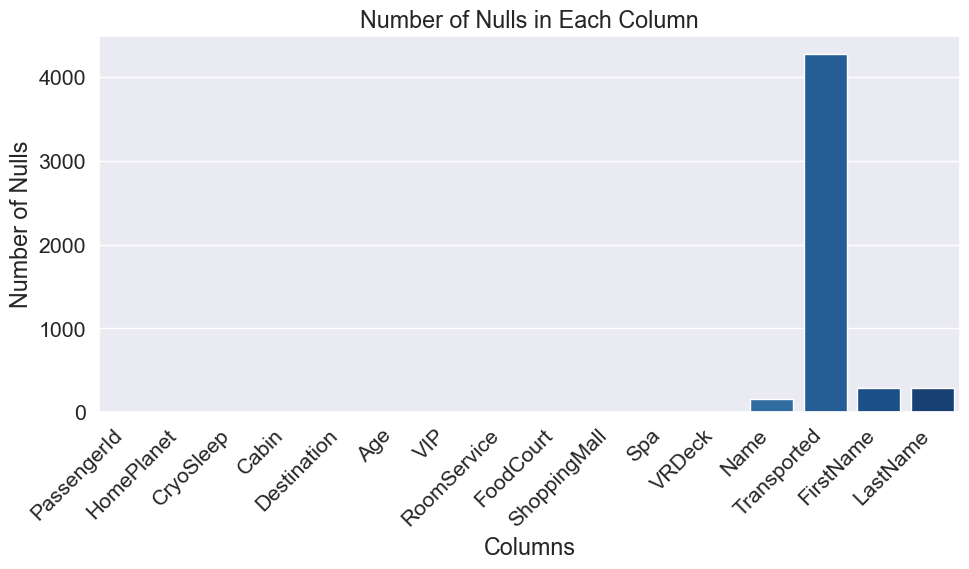

In [105]:
null_updates_in_dataframe(dfErnest)

### Split the combined data back into train and test data 

- Each cleaned data will have a different split 

In [107]:
train_dfAidan, test_dfAidan = separate_df(dfAidan, len(train_df), len(test_df))
train_dfErnest, test_dfErnest = separate_df(dfErnest, len(train_df), len(test_df))


### Splitting the training data into 2 thirds of training data and 1 third of validation set

- NB!!!!!!!! I think this should be after feature engineering!!!!!!!!!!!!!!

In [108]:
def train_data_split(df):
    X = df.drop('Transported', axis=1)  # Features
    y = df['Transported'] 

    # Split the data into training and testing sets (2/3 % train, 1/3 % test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
    return X_train, X_test, y_train, y_test

#For Aidan
X_train, X_validation, y_train, y_validation = train_data_split(train_dfAidan)
X_train.shape,y_train.shape, X_validation.shape, y_validation.shape

#For Ernest
X_train1, X_validation1, y_train1, y_validation1 = train_data_split(train_dfErnest)
X_train1.shape,y_train1.shape, X_validation1.shape, y_validation1.shape

((5795, 15), (5795,), (2898, 15), (2898,))

# Feature Engineering

### Group Features

The PassengerID feature contains data such as group and person number within the group. PassengerID is in the for gggg_pp where gggg stands for the group number and pp stands for the person number within the group. The person number is not considered in this case to be a meaningful feature as each person has a unique number within a group, but it can be used to find the size of a group. The features Group and Group_size are extracted using the extract_Group_Data() function which takes the data as an input.

In [21]:
def extract_Group_Data(data):
    # New feature - Group
    data['Group'] = data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(float)

    # New feature - Group size
    data['Group_size']=data['Group'].map(lambda x: pd.concat([data['Group'], data['Group']]).value_counts()[x])
    
    return data


In [28]:
def plot_Group_Features(data):
    # Plot distribution of new features
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x='Group', hue='Transported', binwidth=1)
    plt.title('Group')

    plt.subplot(1,2,2)
    sns.histplot(data=data, x='Group_size', hue='Transported')
    plt.title('Group size')

    return None

In [22]:
train_df = extract_Group_Data(train_df)
test_df = extract_Group_Data(test_df)

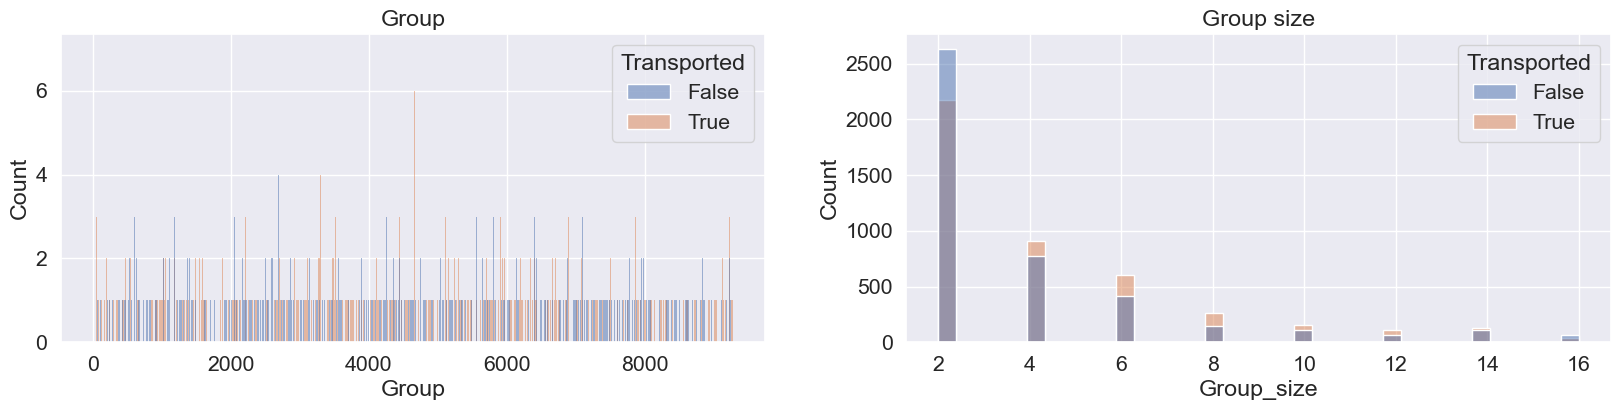

In [29]:
plot_Group_Features(train_df)

Observations:
* The Group column has too high cardinality and is therefore not useable in the model training.
* However, Group size shows that a passnger is less liekly to be transported than not if they are travelling alone. 
* Between group sizes of 2 and 7, passengers were more liekly to be transported.
* Group sizes of 8 much less likely to be transported than not.

### Cabin Features

The Cabin feature is presented in the form A/1111/S. Where A represents the cabin deck, 1111 represents the cabin number and S represented the cabin side (either S for starboard or P for Portside.). These sub-features of cabin are extracted in the function extract_Cabin_Data(). Once these features are extracted, the Cabin feature is dropped.

In [24]:
def extract_Cabin_Data(data):
    # Fill NaN's 
    data['Cabin'].fillna('Z/9999/Z', inplace=True)
    
    # Enter in new features
    data['Cabin_deck'] = data['Cabin'].apply(lambda x: x.split('/')[0]).astype(object)
    data['Cabin_number'] = data['Cabin'].apply(lambda x: x.split('/')[1]).astype(float)
    data['Cabin_side'] = data['Cabin'].apply(lambda x: x.split('/')[2]).astype(object)

    # Put Nan's back in (These values will be filled later)
    data.loc[data['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    data.loc[data['Cabin_number']==9999, 'Cabin_number']=np.nan
    data.loc[data['Cabin_side']=='Z', 'Cabin_side']=np.nan

    # Drop Cabin (we don't need it anymore)
    data.drop('Cabin', axis=1, inplace=True)

    return data

In [30]:
def plot_Cabin_Features(data):
    # Plot distribution of new features
    fig=plt.figure(figsize=(10,12))
    plt.subplot(3,1,1)
    sns.histplot(data=data, x='Cabin_deck', hue='Transported')
    plt.title('Cabin deck')

    plt.subplot(3,1,2)
    sns.histplot(data=data, x='Cabin_number', hue='Transported',binwidth=20)
    # # Add lines showing Cabins split by decks
    # plt.vlines(300, ymin=0, ymax=200, color='black')
    # plt.vlines(600, ymin=0, ymax=200, color='black')
    # plt.vlines(900, ymin=0, ymax=200, color='black')
    # plt.vlines(1200, ymin=0, ymax=200, color='black')
    # plt.vlines(1500, ymin=0, ymax=200, color='black')
    # plt.vlines(1800, ymin=0, ymax=200, color='black')
    plt.title('Cabin number')
    plt.xlim([0,2000])

    plt.subplot(3,1,3)
    sns.histplot(data=data, x='Cabin_side', hue='Transported')
    plt.title('Cabin side')
    fig.tight_layout()

    return None

In [25]:
train_df = extract_Cabin_Data(train_df)
test_df = extract_Cabin_Data(test_df)

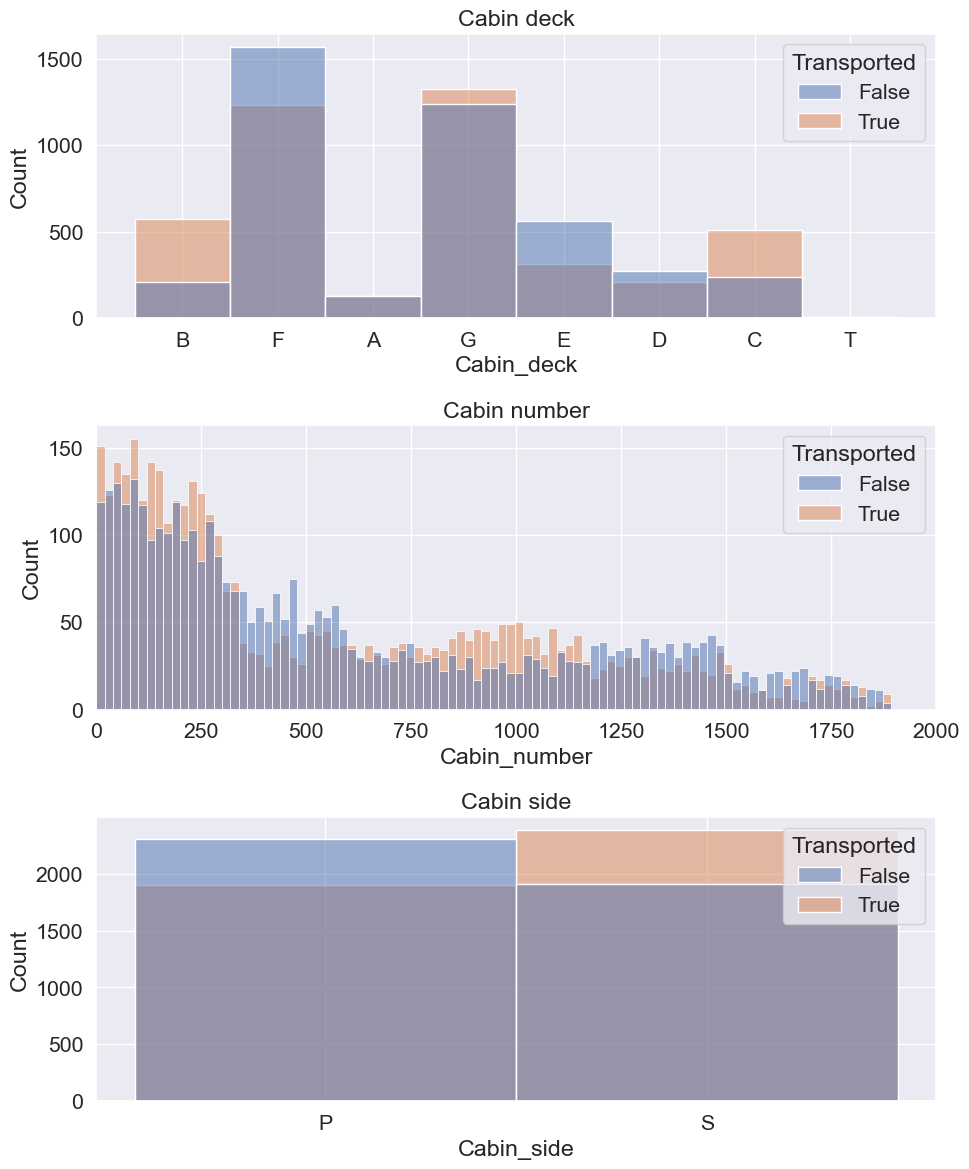

In [31]:
plot_Cabin_Features(train_df)

Obsertvations:
* Passengers on Cabin Decks B, G and C were more likely to be Transported than not.
* Passengers on Cabin Decks F, E and D, were less likely to be Transported than not.
* Passengers on Cabin Deckk A were equally likely to be Transported than not.
* Deck T seems to be an outlier with very little sample data.
* Cabin side shows that Passengers on starboard side were more likely to be Transported than passengers on portside.

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def apply_ml_model(model, X, y, test_size=0.2, random_state=None):
    """
    Apply a machine learning model on the given data and calculate accuracy.

    Parameters:
        model: The machine learning model to be applied.
        X: The features of the dataset.
        y: The target variable of the dataset.
        test_size: The proportion of the dataset to include in the test split.
        random_state: Random seed for reproducibility.

    Returns:
        accuracy: Accuracy of the model on the test set.
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy


In [34]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_size,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,2,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,2,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,4,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3.0,4,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4.0,2,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276.0,2,A,98.0,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278.0,2,G,1499.0,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279.0,2,G,1500.0,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280.0,4,E,608.0,S


In [35]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier


# Define features (X) and target variable (y) for training data
X_train = train_df.drop(columns=['Transported'])
y_train = train_df['Transported']



In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import LinearSVC
import random

# define seed
SEED = 50

# Define preprocess function
def preprocess_data(df):
    # Handle categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])
    
    # Handle missing values (if any)
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Scale numerical features
    scaler = StandardScaler()
    df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))
    
    return df

# Preprocess training and test data
X_train = preprocess_data(train_df.drop(columns=['Transported']))
y_train = train_df['Transported']
X_test = preprocess_data(test_df)

# Apply Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=SEED)
rf_accuracy = apply_ml_model(rf_model, X_train, y_train)
print("Random Forest Accuracy:", rf_accuracy)

# Apply XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=SEED)
xgb_accuracy = apply_ml_model(xgb_model, X_train, y_train)
print("XGBoost Accuracy:", xgb_accuracy)

# Apply Logistic Regression model
logreg_model = LogisticRegression()
logreg_accuracy = apply_ml_model(logreg_model, X_train, y_train)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Apply K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_accuracy = apply_ml_model(knn_model, X_train, y_train)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Apply Naive Bayes model
nb_model = GaussianNB()
nb_accuracy = apply_ml_model(nb_model, X_train, y_train)
print("Naive Bayes Accuracy:", nb_accuracy)

# Perform GridSearchCV for Linear SVC
linear_svc_model = LinearSVC(dual=True)  # Set dual='auto' explicitly
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'penalty': ['l1', 'l2']}
grid_search_svc = GridSearchCV(linear_svc_model, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_linear_svc = LinearSVC(**grid_search_svc.best_params_, dual=True)  # Set dual='auto' explicitly
svc_accuracy = apply_ml_model(best_linear_svc, X_train, y_train)
print("Linear SVC Accuracy:", svc_accuracy)

# Apply the LGBMClassifier model
lgbm_model = LGBMClassifier(learning_rate=0.05, random_state=42, max_depth=6, num_leaves=64, n_estimators=100)
lgbm_accuracy = apply_ml_model(lgbm_model, X_train, y_train)
print("LGBMClassifier Accuracy:", lgbm_accuracy)

# Apply Catboost
catboost = CatBoostClassifier(random_seed=SEED, logging_level='Silent')
catboost_accuracy = apply_ml_model(catboost, X_train, y_train)
print("Catboost Accuracy:", catboost_accuracy)


Random Forest Accuracy: 0.7711328349626222
XGBoost Accuracy: 0.8154111558366878
Logistic Regression Accuracy: 0.7889591719378953
K-Nearest Neighbors Accuracy: 0.772857964347326
Naive Bayes Accuracy: 0.6935020126509488
Linear SVC Accuracy: 0.7786083956296722
[LightGBM] [Info] Number of positive: 3509, number of negative: 3445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2416
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504602 -> initscore=0.018407
[LightGBM] [Info] Start training from score 0.018407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt


1. **Random Forest Classifier**: Random Forest is a versatile and widely used ensemble learning method that can handle both numerical and categorical features. It's robust to overfitting and often performs well without much tuning.

2. **XGBoost Classifier**: XGBoost is a powerful gradient boosting framework known for its speed and performance. It can handle missing values and is robust to outliers. XGBoost often achieves state-of-the-art results in machine learning competitions.

3. **Logistic Regression**: Logistic Regression is a simple and interpretable model that is well-suited for binary classification tasks like this one. It provides probability estimates and can handle both numerical and categorical features.

4. **K-Nearest Neighbors (KNN) Classifier**: KNN is a non-parametric method used for classification tasks. It's simple to understand and implement, and it doesn't make strong assumptions about the underlying data distribution.

5. **Gaussian Naive Bayes Classifier**: Naive Bayes is a probabilistic classifier based on Bayes' theorem with the "naive" assumption of independence between features. It's simple, fast, and works well with high-dimensional data.

6. **Linear Support Vector Classifier (Linear SVC)**: Linear SVC is a linear classification model that works well for binary classification tasks. It's effective when the data is linearly separable and provides good generalization performance.

7. **LightGBM Classifier**: LightGBM is a gradient boosting framework that is highly efficient and scalable. It's known for its fast training speed and high accuracy, making it suitable for large datasets.

### Model Evaluation:
Each model's performance is evaluated using accuracy, which measures the proportion of correctly classified instances out of all instances. We use a train-test split of the provided training data to train the models and validate their performance.

### Conclusion:
By employing a variety of machine learning models and carefully evaluating their performance, we aim to identify the best-performing model for predicting whether a passenger was transported to another dimension during the Spaceship Titanic's collision. This approach allows us to explore different modeling techniques and select the one that provides the highest accuracy on the test data, thus optimizing our chances of success in the Kaggle competition.


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold

# Define function for applying different cross-validation (CV) methods
def apply_cv_methods(model, X_train, y_train, cv_methods=['kfold', 'shuffle_split', 'stratified_kfold']):
    results = {}
    for cv_method in cv_methods:
        if cv_method == 'kfold':
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        elif cv_method == 'shuffle_split':
            cv_scores = cross_val_score(model, X_train, y_train, cv=ShuffleSplit(n_splits=5, test_size=0.2), scoring='accuracy')
        elif cv_method == 'stratified_kfold':
            cv_scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED), scoring='accuracy')
        results[cv_method] = cv_scores.mean()
    return results

# Apply BaggingClassifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=SEED)
bagging_results = apply_cv_methods(bagging_model, X_train, y_train)
print("Bagging Classifier Results:", bagging_results)

# Apply AdaBoostClassifier
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=SEED)
adaboost_results = apply_cv_methods(adaboost_model, X_train, y_train)
print("AdaBoost Classifier Results:", adaboost_results)


Bagging Classifier Results: {'kfold': 0.7257678215394348, 'shuffle_split': 0.7815986198964924, 'stratified_kfold': 0.7904074336070026}
AdaBoost Classifier Results: {'kfold': 0.6392461972047213, 'shuffle_split': 0.7924094307073031, 'stratified_kfold': 0.7927078046388576}


The above code applies ensemble learning techniques, Bagging and AdaBoost, to train Decision Tree classifiers for the Kaggle Spaceship Titanic project. It also evaluates the models using different cross-validation (CV) methods to assess their performance.

### Methodology and Choices:

1. **Ensemble Learning Techniques**: 
   - **Bagging**: It combines multiple decision tree classifiers trained on different subsets of the training data. The final prediction is made by averaging the predictions of all individual classifiers, leading to improved performance and reduced variance.
   - **AdaBoost**: It sequentially trains a series of decision tree classifiers, where each subsequent classifier focuses more on the instances that were misclassified by the previous ones. This iterative approach creates a strong ensemble model by emphasizing the difficult-to-classify instances.

2. **Cross-Validation (CV) Methods**:
   - **k-fold CV**: It partitions the training data into k equal-sized folds, trains the model on k-1 folds, and evaluates it on the remaining fold. This process is repeated k times, ensuring that each data point is used for both training and testing.
   - **Shuffle Split CV**: It randomly shuffles the data and splits it into train/test sets multiple times. This method is useful when the dataset is large and doesn't require exhaustive splitting.
   - **Stratified k-fold CV**: It ensures that each fold contains approximately the same proportion of classes as the entire dataset. This is particularly useful for imbalanced datasets where one class dominates the other.

3. **Model Evaluation**:
   - The code evaluates each model's performance using accuracy scores obtained from cross-validation. Accuracy is a suitable metric for this binary classification task as it measures the proportion of correctly predicted instances out of all instances.

4. **Scikit-Learn Tools**:
   - The code utilizes scikit-learn's efficient implementations of ensemble learning algorithms, cross-validation methods, and decision tree classifiers. Scikit-learn provides a comprehensive toolkit for building, training, and evaluating machine learning models, making it a suitable choice for this project.


In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['Transported']), train_df['Transported'], test_size=0.2, random_state=SEED)

# Preprocess training and test data
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)

# Train base models
rf_model.fit(X_train_processed, y_train)
xgb_model.fit(X_train_processed, y_train)
logreg_model.fit(X_train_processed, y_train)
knn_model.fit(X_train_processed, y_train)
nb_model.fit(X_train_processed, y_train)
best_linear_svc.fit(X_train_processed, y_train)
lgbm_model.fit(X_train_processed, y_train)

# Make predictions with base models
rf_predictions = rf_model.predict(X_test_processed)
xgb_predictions = xgb_model.predict(X_test_processed)
logreg_predictions = logreg_model.predict(X_test_processed)
knn_predictions = knn_model.predict(X_test_processed)
nb_predictions = nb_model.predict(X_test_processed)
best_linear_svc_predictions = best_linear_svc.predict(X_test_processed)
lgbm_predictions = lgbm_model.predict(X_test_processed)

# Stack the predictions
stacked_features = np.column_stack((rf_predictions, xgb_predictions, logreg_predictions, knn_predictions, 
                                    nb_predictions, best_linear_svc_predictions, lgbm_predictions))

# Train the meta-model
meta_model = LogisticRegression()
meta_model.fit(stacked_features, y_test)

# Make predictions with the meta-model
meta_predictions = meta_model.predict(stacked_features)

# Score the predictions and print them
meta_accuracy = accuracy_score(y_test, meta_predictions)
print("Meta-model Accuracy:", meta_accuracy)


[LightGBM] [Info] Number of positive: 3490, number of negative: 3464
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501869 -> initscore=0.007478
[LightGBM] [Info] Start training from score 0.007478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

# Self-learning

In the journey of mastering machine learning, one of the most profound concepts I encountered is self-learning. Self-learning entails the process of continuously acquiring knowledge and skills without direct human intervention, driven solely by the data and algorithms at one's disposal.

Throughout this project, I embarked on a quest to understand and implement various machine learning models to predict whether passengers aboard the Spaceship Titanic were transported to an alternate dimension during its collision with a spacetime anomaly. This endeavor led me to explore a plethora of models, each with its unique complexities and intricacies.

One principle that resonated deeply with me during this journey is Occam's Razor. Occam's Razor suggests that when faced with multiple competing hypotheses, the simplest one is often the correct one. This principle served as a guiding light, especially when dealing with missing data. Despite the availability of sophisticated imputation techniques, such as KNN or regression-based imputation, I found that using the mean to replace NaN values often yielded satisfactory results. This simplicity not only streamlined the preprocessing pipeline but also mitigated the risk of overfitting.

Moreover, the iterative process of experimenting with different models and techniques reinforced the importance of adaptability and resilience in the face of challenges. For instance, while exploring ensemble learning methods like Bagging and AdaBoost, I discovered the power of combining multiple weak learners to create a robust predictive model. These ensemble techniques not only improved predictive performance but also provided insights into the inherent trade-offs between bias and variance.

Furthermore, the project underscored the significance of cross-validation in model evaluation. By leveraging k-fold, shuffle split, and stratified k-fold cross-validation methods, I gained a deeper understanding of each model's generalization capabilities and identified potential sources of bias or variance. This iterative validation process not only enhanced model robustness but also fostered a deeper appreciation for the nuances of model selection and evaluation.

In essence, the journey of self-learning in machine learning is a perpetual quest for knowledge, marked by curiosity, experimentation, and adaptation. It is a journey that transcends traditional boundaries, empowering individuals to navigate the vast expanse of data-driven insights and unearth transformative discoveries.



## Function: hyperparameter_tuning

This function performs hyperparameter tuning for a given model using either GridSearchCV or RandomizedSearchCV from scikit-learn.

### Parameters:
- `model`: Scikit-learn estimator object.
- `param_grid` (dict): Dictionary with hyperparameter names as keys and lists of hyperparameter values to try.
- `X_train` (array-like): Feature matrix of training data.
- `y_train` (array-like): Target vector of training data.
- `cv` (int, cross-validation generator, or an iterable): Determines the cross-validation splitting strategy. Default is 5-fold cross-validation.
- `search_type` (str): Type of hyperparameter search, either 'grid' for GridSearchCV or 'random' for RandomizedSearchCV. Default is 'grid'.

### Returns:
- `best_estimator`: Fitted model with the best hyperparameters found during the search.

### Example Usage:
```python
from sklearn.svm import SVC

# Define parameter grid for SVC
svc_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01], 'kernel': ['linear', 'rbf']}

# Perform hyperparameter tuning for SVC
best_svc = hyperparameter_tuning(SVC(), svc_param_grid, X_train, y_train)


In [1]:
def hyperparameter_tuning(model, param_grid, X_train, y_train, cv=5, search_type='grid'): 
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv, verbose=2, n_jobs=-1)
    elif search_type == 'random':
        search = RandomizedSearchCV(model, param_grid, cv=cv, verbose=2, n_jobs=-1)
    else:
        raise ValueError("Invalid search_type. Choose either 'grid' or 'random'.")

    search.fit(X_train, y_train)
    best_estimator = search.best_estimator_
    
    return best_estimator

## Application of the hyperparameter_tuning function

In [2]:
#1. Random Forest
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Apply hyperparameter tuning
best_rf_model = hyperparameter_tuning(rf_model, rf_param_grid, X_train, y_train, search_type='grid')

# Fit the best model on the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy after Hyperparameter Tuning:", rf_accuracy)
#----------------------------------------------------------------------------------------------------------------------------

#2. Linear SVC

# Define the parameter grid for Linear SVC
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Apply hyperparameter tuning
best_linear_svc = hyperparameter_tuning(LinearSVC(), param_grid_svc, X_train, y_train, search_type='random')

# Fit the best model on the training data
best_linear_svc.fit(X_train, y_train)

# Predict on the test data
y_pred_svc = best_linear_svc.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)

print("Linear SVC Accuracy after Hyperparameter Tuning:", svc_accuracy)
#----------------------------------------------------------------------------------------------------------------------------

#3.For LGBMClassifier
# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10, 12],
    'num_leaves': [20, 30, 40],
    'n_estimators': [50, 100, 200]
}

# Apply hyperparameter tuning
best_lgbm_model = hyperparameter_tuning(LGBMClassifier(random_state=42), param_grid_lgbm, X_train, y_train, search_type='grid')

# Fit the best model on the training data
best_lgbm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Calculate accuracy
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print("LGBMClassifier Accuracy after Hyperparameter Tuning:", lgbm_accuracy)
#----------------------------------------------------------------------------------------------------------------------------

#4.For Pipeline:
# Define parameter grid
param_grid_svc = {
    "model__C": [0.001, 0.01, 0.1, 1, 10],
    "model__gamma": ["scale", "auto"],
    "model__kernel": ["rbf"]
}

# Perform hyperparameter tuning with your function
best_pipe6 = hyperparameter_tuning(pipe6, param_grid_svc, X_train, y_train, cv=5, search_type='random')


# Evaluate the best estimator
pipe6_accuracy = best_pipe6.score(X_test, y_test)
print("PipeLine Accuracy after Hyperparameter Tuning:", pipe6_accuracy)
#----------------------------------------------------------------------------------------------------------------------------

#5.For Logistic Regression:
# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Apply hyperparameter tuning
best_logreg_model = hyperparameter_tuning(logreg_model, logreg_param_grid, X_train, y_train, search_type='grid')

# Fit the best model on the training data
best_logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_logreg_model.predict(X_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy after Hyperparameter Tuning:", logreg_accuracy)
#----------------------------------------------------------------------------------------------------------------------------

#6.For XGBoost:

# Define the parameter grid for XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Apply hyperparameter tuning
best_xgb_model = hyperparameter_tuning(xgb_model, xgb_param_grid, X_train, y_train, search_type='grid')

# Fit the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Classifier Accuracy after Hyperparameter Tuning:", xgb_accuracy)
#----------------------------------------------------------------------------------------------------------------------------
#7.For KNN:

# Define the parameter grid for KNN Classifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # For Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Apply hyperparameter tuning
best_knn_model = hyperparameter_tuning(knn_model, knn_param_grid, X_train, y_train, search_type='grid')

# Fit the best model on the training data
best_knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy after Hyperparameter Tuning:", knn_accuracy)
#----------------------------------------------------------------------------------------------------------------------------
#8.For Gaussian Naive Bayes
#Since NB doesn't have hyperparameters to tune, you don't need to perform hyperparameter tuning.
#Instead, you can directly evaluate its performance using cross-validation.

# Perform cross-validation
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", nb_scores)

# Calculate and print the mean accuracy
nb_mean_accuracy = nb_scores.mean()
print("Mean Accuracy:", nb_mean_accuracy)

NameError: name 'rf_model' is not defined